In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [3]:
pd.set_option("display.max_columns", None)
pd.set_option('display.max_rows', None)

In [4]:
data = pd.read_csv(r"C:\Users\6623682\Python Projects\churn analytics\WA_Fn-UseC_-Telco-Customer-Churn.csv")
print(data.shape)

data.head(3)

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [5]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
df, val_df = train_test_split(data, test_size=0.10, random_state=42, stratify=data['Churn'])

In [9]:
df.shape

(6338, 21)

In [10]:
val_df.shape

(705, 21)

In [11]:
df['Churn_target'] = np.where(df['Churn']=='Yes', 1, 0)
df['Churn_target'].value_counts()

Churn_target
0    4656
1    1682
Name: count, dtype: int64

In [12]:
def bivariate_table_analysis(data, categorical_cols, target_col='churn'):
    for col in categorical_cols:
        print(f"\n Bivariate Analysis: {col} vs {target_col}")
        
        temp = data.groupby(col).agg(
            count_total=(target_col, 'count'),
            count_yes=(target_col, 'sum'),
            churn_percent=(target_col, 'mean')
        )
        
        temp['count_no'] = temp['count_total'] - temp['count_yes']
        temp['churn_percent'] *= 100
        # temp['average'] = temp['churn_percent'].mean()

        temp = temp.reset_index()
        display(temp)

In [13]:
cat_cols = [ 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']

bivariate_table_analysis(df, cat_cols, 'Churn_target')


 Bivariate Analysis: gender vs Churn_target


,gender,count_total,count_yes,churn_percent,count_no
0,Female,3135,847,27.017544,2288
1,Male,3203,835,26.069310,2368



 Bivariate Analysis: SeniorCitizen vs Churn_target


,SeniorCitizen,count_total,count_yes,churn_percent,count_no
0,0,5310,1260,23.728814,4050
1,1,1028,422,41.050584,606



 Bivariate Analysis: Partner vs Churn_target


,Partner,count_total,count_yes,churn_percent,count_no
0,No,3295,1077,32.685888,2218
1,Yes,3043,605,19.881696,2438



 Bivariate Analysis: Dependents vs Churn_target


,Dependents,count_total,count_yes,churn_percent,count_no
0,No,4466,1395,31.236005,3071
1,Yes,1872,287,15.331197,1585



 Bivariate Analysis: PhoneService vs Churn_target


,PhoneService,count_total,count_yes,churn_percent,count_no
0,No,623,154,24.719101,469
1,Yes,5715,1528,26.736658,4187



 Bivariate Analysis: MultipleLines vs Churn_target


,MultipleLines,count_total,count_yes,churn_percent,count_no
0,No,3029,762,25.156817,2267
1,No phone service,623,154,24.719101,469
2,Yes,2686,766,28.518243,1920



 Bivariate Analysis: InternetService vs Churn_target


,InternetService,count_total,count_yes,churn_percent,count_no
0,DSL,2183,418,19.147962,1765
1,Fiber optic,2782,1162,41.768512,1620
2,No,1373,102,7.428988,1271



 Bivariate Analysis: OnlineSecurity vs Churn_target


,OnlineSecurity,count_total,count_yes,churn_percent,count_no
0,No,3163,1319,41.700917,1844
1,No internet service,1373,102,7.428988,1271
2,Yes,1802,261,14.483907,1541



 Bivariate Analysis: OnlineBackup vs Churn_target


,OnlineBackup,count_total,count_yes,churn_percent,count_no
0,No,2772,1104,39.826840,1668
1,No internet service,1373,102,7.428988,1271
2,Yes,2193,476,21.705426,1717



 Bivariate Analysis: DeviceProtection vs Churn_target


,DeviceProtection,count_total,count_yes,churn_percent,count_no
0,No,2789,1090,39.082108,1699
1,No internet service,1373,102,7.428988,1271
2,Yes,2176,490,22.518382,1686



 Bivariate Analysis: TechSupport vs Churn_target


,TechSupport,count_total,count_yes,churn_percent,count_no
0,No,3119,1303,41.776210,1816
1,No internet service,1373,102,7.428988,1271
2,Yes,1846,277,15.005417,1569



 Bivariate Analysis: StreamingTV vs Churn_target


,StreamingTV,count_total,count_yes,churn_percent,count_no
0,No,2525,846,33.504950,1679
1,No internet service,1373,102,7.428988,1271
2,Yes,2440,734,30.081967,1706



 Bivariate Analysis: StreamingMovies vs Churn_target


,StreamingMovies,count_total,count_yes,churn_percent,count_no
0,No,2493,843,33.814681,1650
1,No internet service,1373,102,7.428988,1271
2,Yes,2472,737,29.813916,1735



 Bivariate Analysis: Contract vs Churn_target


,Contract,count_total,count_yes,churn_percent,count_no
0,Month-to-month,3492,1493,42.754868,1999
1,One year,1328,146,10.993976,1182
2,Two year,1518,43,2.832675,1475



 Bivariate Analysis: PaperlessBilling vs Churn_target


,PaperlessBilling,count_total,count_yes,churn_percent,count_no
0,No,2589,422,16.299730,2167
1,Yes,3749,1260,33.608962,2489



 Bivariate Analysis: PaymentMethod vs Churn_target


,PaymentMethod,count_total,count_yes,churn_percent,count_no
0,Bank transfer (automatic),1383,230,16.630513,1153
1,Credit card (automatic),1365,201,14.725275,1164
2,Electronic check,2136,973,45.552434,1163
3,Mailed check,1454,278,19.119670,1176


In [14]:
def multi_column_analysis(data, cols, target_col='churn'):
    print(f"\nBivariate Analysis: {' + '.join(cols)} vs {target_col}")
    
    temp = data.groupby(cols).agg(
        count_total=(target_col, 'count'),
        count_yes=(target_col, 'sum'),
        churn_percent=(target_col, 'mean')
    ).reset_index()

    temp['count_no'] = temp['count_total'] - temp['count_yes']
    temp['churn_percent'] *= 100

    display(temp)
    
cols = ['SeniorCitizen', 'Partner', 'Dependents']

multi_column_analysis(df, cols, 'Churn_target')


Bivariate Analysis: SeniorCitizen + Partner + Dependents vs Churn_target


,SeniorCitizen,Partner,Dependents,count_total,count_yes,churn_percent,count_no
0,0,No,No,2469,763,30.903200,1706
1,0,No,Yes,317,67,21.135647,250
2,0,Yes,No,1051,229,21.788773,822
3,0,Yes,Yes,1473,201,13.645621,1272
4,1,No,No,502,246,49.003984,256
5,1,No,Yes,7,1,14.285714,6
6,1,Yes,No,444,157,35.360360,287
7,1,Yes,Yes,75,18,24.000000,57


In [15]:
def plot_stacked_churn(data, var_list, target_col='churn_target'):
    for col in var_list:
        ct = pd.crosstab(data[col], data[target_col], normalize='index') * 100
        ct.plot(kind='bar', stacked=True, figsize=(8, 4), colormap='Set2')
        plt.title(f'{col} vs {target_col} (Stacked % Chart)')
        plt.ylabel('Percentage')
        plt.xlabel(col)
        plt.xticks(rotation=45)
        plt.legend(title=target_col, loc='upper right')
        plt.tight_layout()
        plt.show()

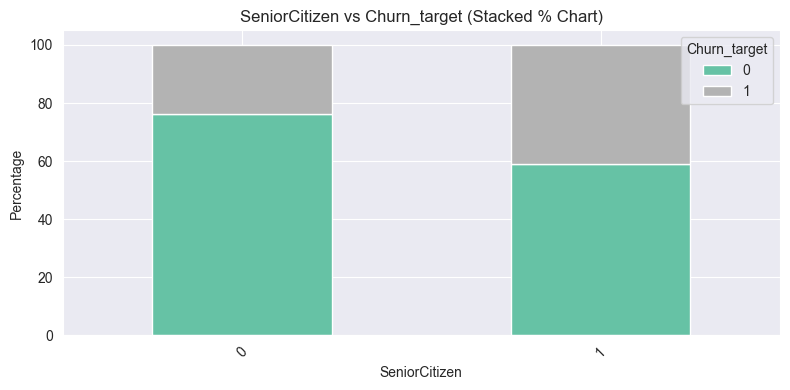

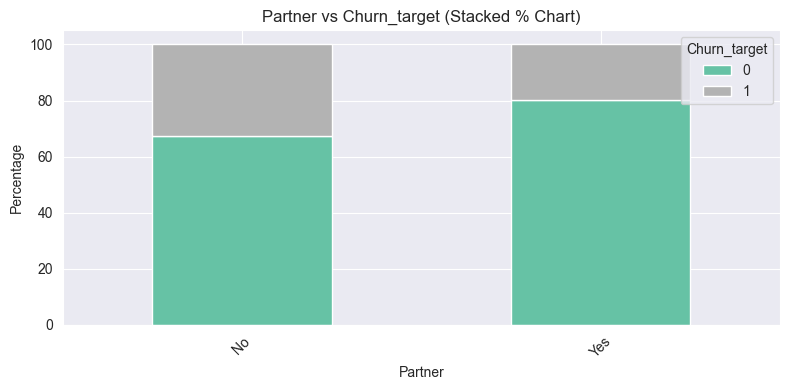

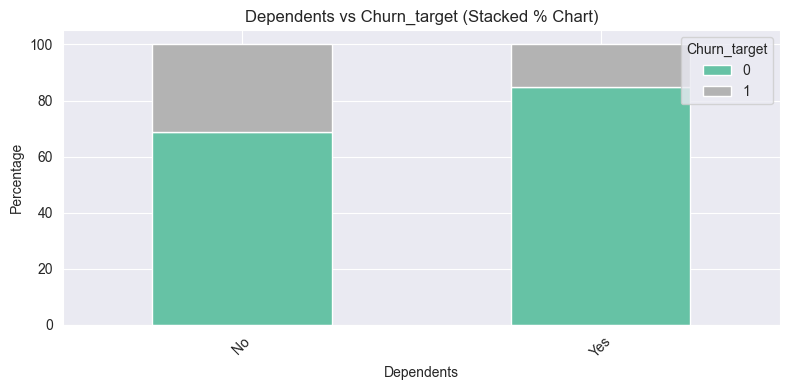

In [16]:
l = ['SeniorCitizen', 'Partner', 'Dependents']
plot_stacked_churn(df, l, 'Churn_target')

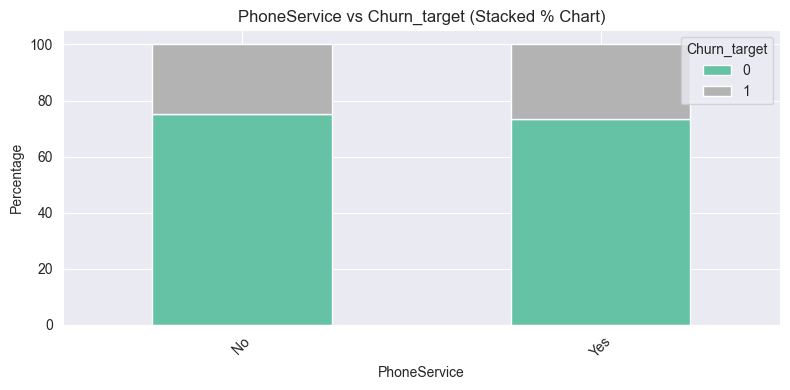

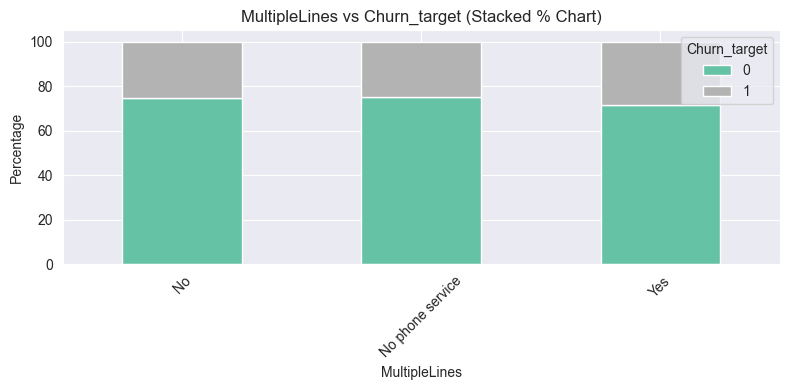

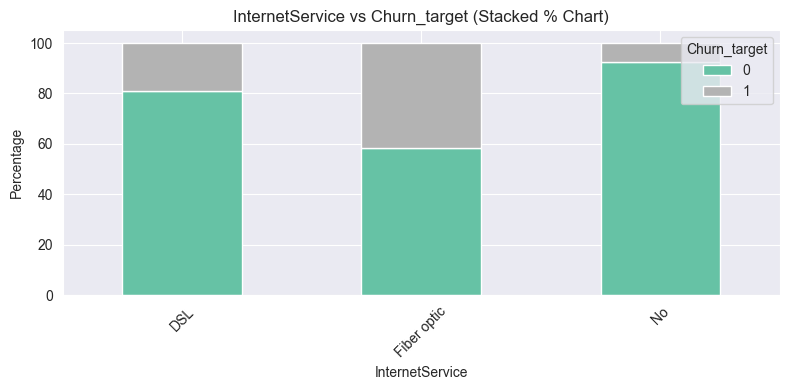

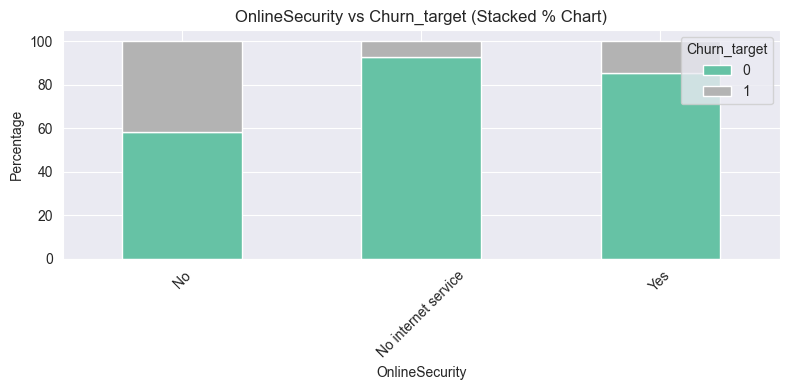

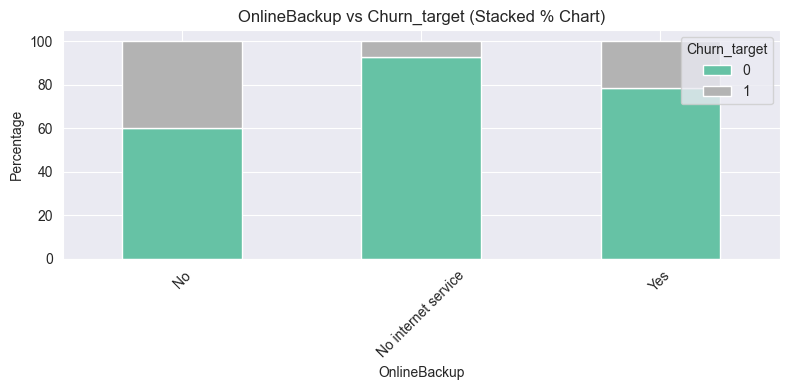

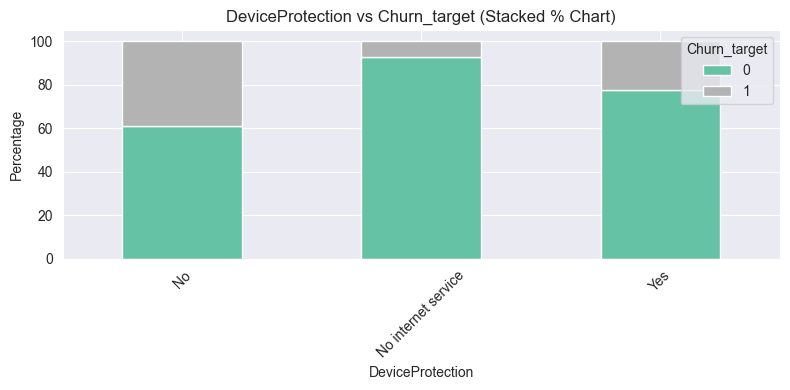

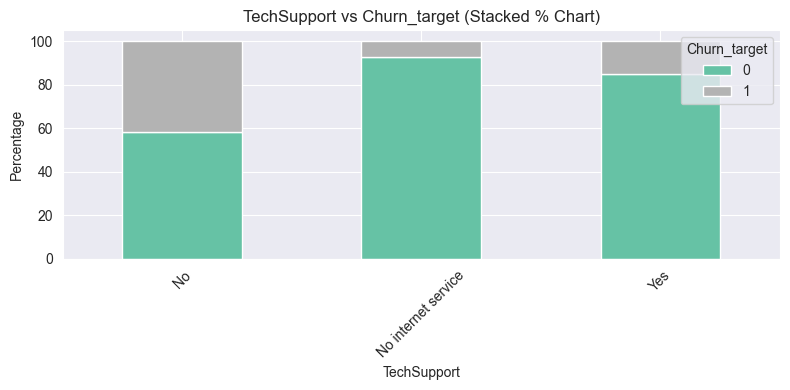

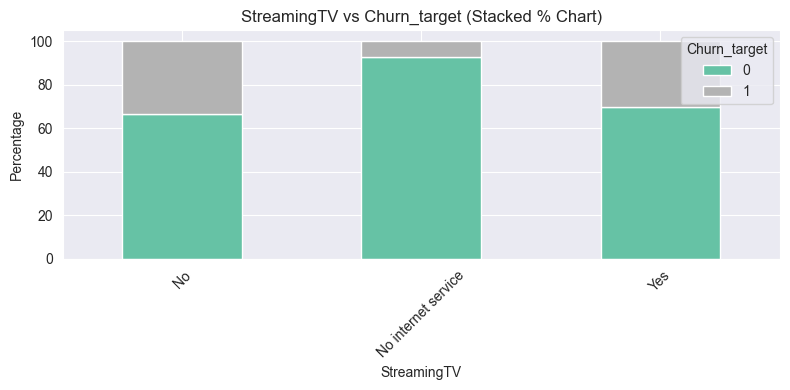

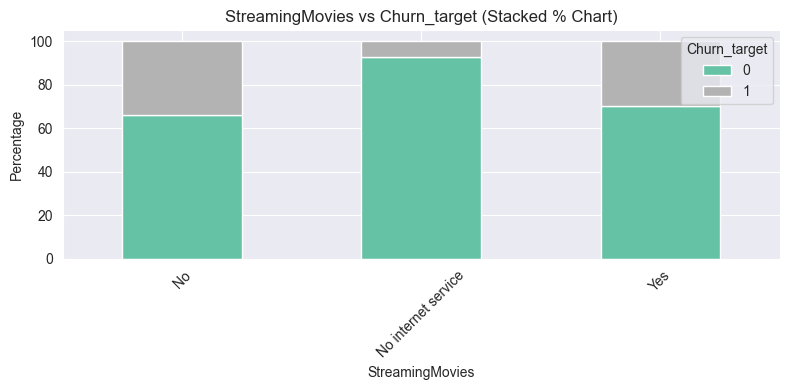

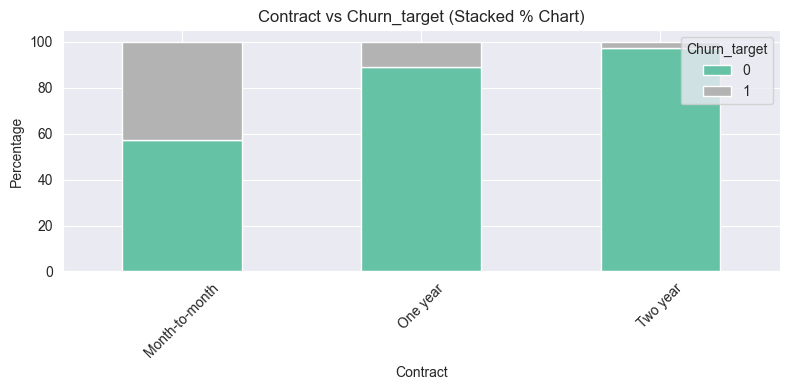

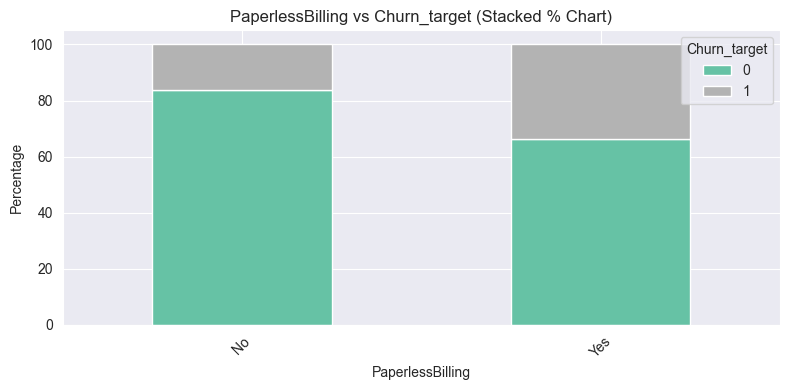

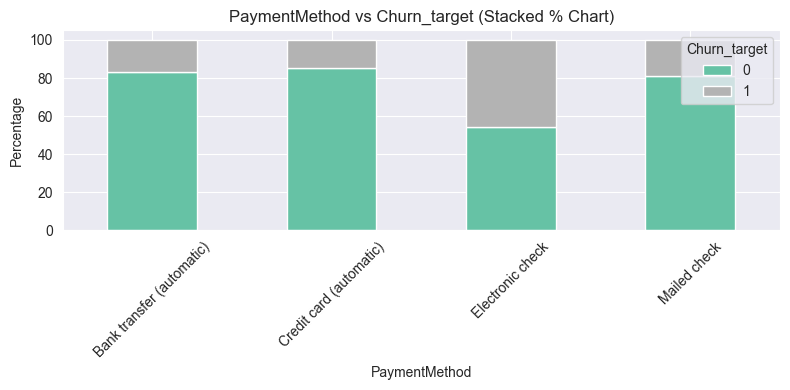

In [17]:
l = ['PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']
plot_stacked_churn(df, l, 'Churn_target')

In [18]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Churn_target'],
      dtype='object')

In [19]:
def plot_tenure_histogram(data, col='tenure', bins=10):
    plt.figure(figsize=(8, 4))
    plt.hist(data[col], bins=bins, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

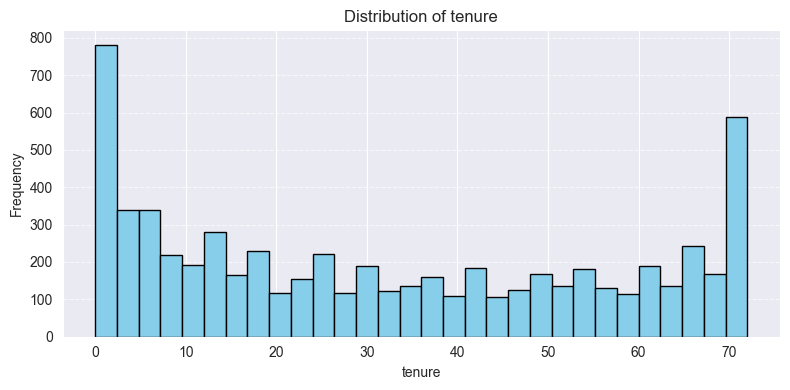

In [20]:
plot_tenure_histogram(df, 'tenure', bins=30)

In [21]:
def plot_tenure_line(data,l, target_col='churn_target'):
    grouped = data.groupby([l, target_col]).size().unstack(fill_value=0)
    grouped = grouped.sort_index()

    plt.figure(figsize=(10, 5))
    plt.plot(grouped.index, grouped[0], label='Churn = No', color='green')
    plt.plot(grouped.index, grouped[1], label='Churn = Yes', color='red')
    plt.title(f'{l} vs Churn Trend')
    plt.xlabel(l)
    plt.ylabel('Count')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


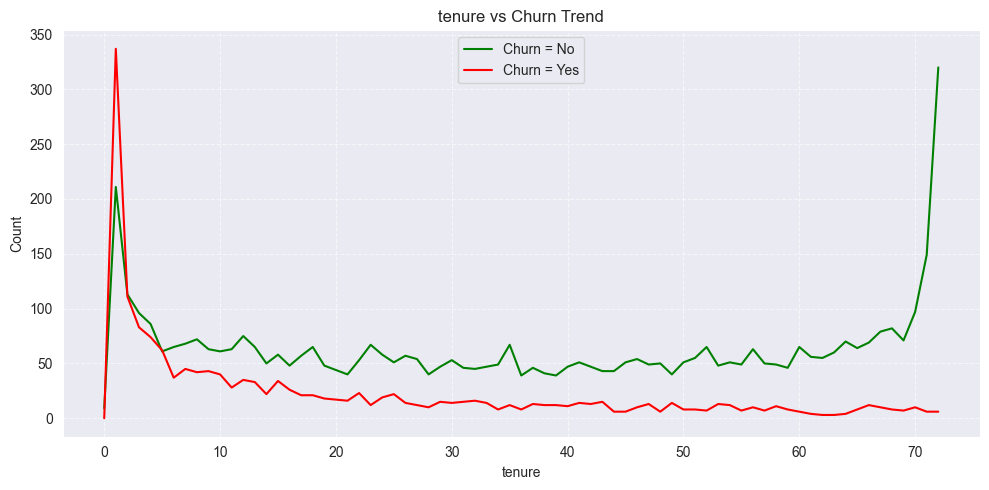

In [22]:
plot_tenure_line(df, 'tenure','Churn_target')

In [23]:
df['MonthlyCharges'].describe()

count    6338.000000
mean       64.754804
std        30.154417
min        18.400000
25%        35.412500
50%        70.325000
75%        89.937500
max       118.750000
Name: MonthlyCharges, dtype: float64

In [24]:
df['TotalCharges'].describe()

count     6338
unique    5913
top       20.2
freq        11
Name: TotalCharges, dtype: object

In [25]:
df['TotalCharges'].isnull().sum()

np.int64(0)

In [26]:
df['TotalCharges'] = np.where((df['TotalCharges'] == " ") | (df['TotalCharges'].isna()), 0, df['TotalCharges'])
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
df['TotalCharges'].describe()

count    6338.000000
mean     2274.500805
std      2268.657502
min         0.000000
25%       390.512500
50%      1387.175000
75%      3776.825000
max      8684.800000
Name: TotalCharges, dtype: float64

In [27]:
def plot_kde_by_churn(data, col, target_col='Churn_target'):
    plt.figure(figsize=(10, 5))
    sns.kdeplot(data=data[data[target_col] == 0], x=col, fill=True, label='Churn = No')
    sns.kdeplot(data=data[data[target_col] == 1], x=col, fill=True, label='Churn = Yes')

    plt.title(f'KDE Plot: {col} by {target_col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


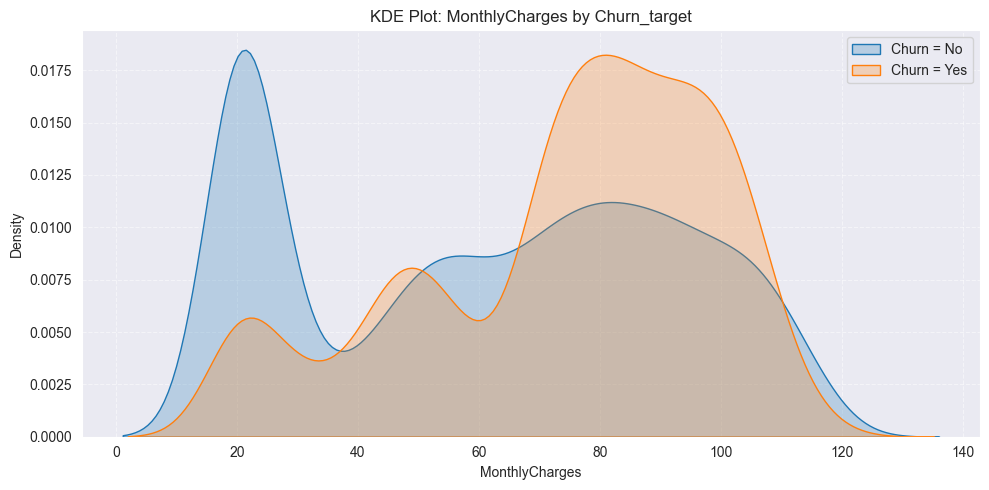

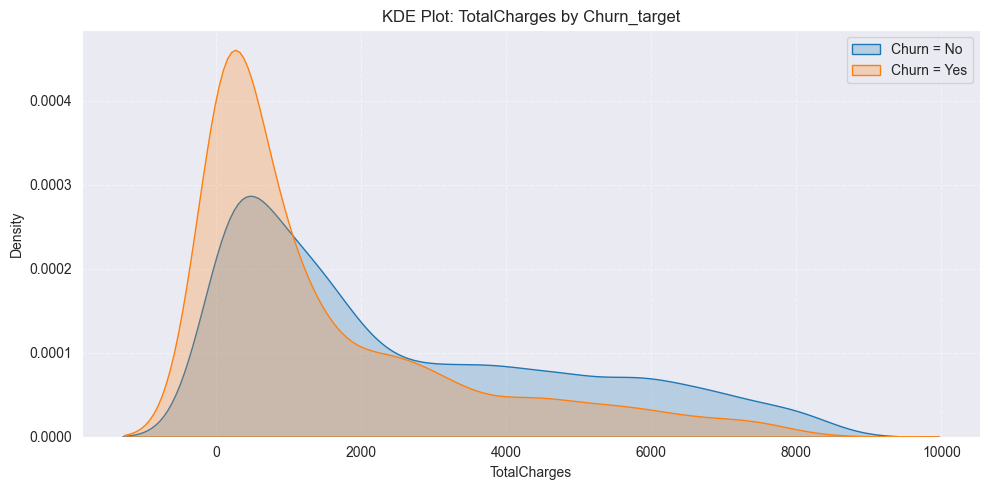

In [28]:
plot_kde_by_churn(df, 'MonthlyCharges', 'Churn_target')
plot_kde_by_churn(df, 'TotalCharges', 'Churn_target')

In [29]:
from scipy.stats import f_oneway

In [30]:
def run_anova_test(data, numerical_cols, target_col='churn_target'):
    results = {}

    for col in numerical_cols:
        group0 = data[data[target_col] == 0][col].dropna()
        group1 = data[data[target_col] == 1][col].dropna()

        stat, p_value = f_oneway(group0, group1)

        results[col] = {
            'F-statistic': stat,
            'p-value': p_value,
            'Significant': 'Yes' if p_value < 0.05 else 'No'
        }

    return pd.DataFrame(results).T

In [31]:
numerical_cols = ['MonthlyCharges', 'TotalCharges']
anova_results = run_anova_test(df, numerical_cols, 'Churn_target')
display(anova_results)

,F-statistic,p-value,Significant
MonthlyCharges,240.645586,0.0,Yes
TotalCharges,258.089593,0.0,Yes


In [32]:
def plot_correlation_heatmap(data):
    data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

    corr = data[['MonthlyCharges', 'TotalCharges']].corr()

    plt.figure(figsize=(5, 4))
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation: MonthlyCharges vs TotalCharges')
    plt.tight_layout()
    plt.show()

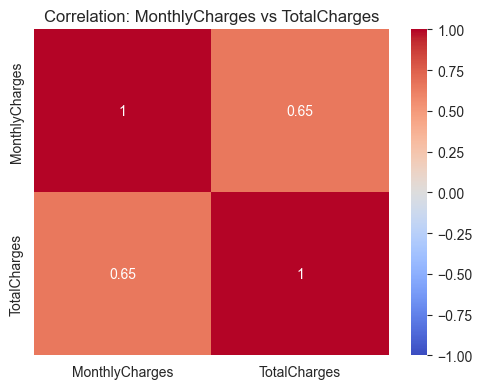

In [33]:
plot_correlation_heatmap(df)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6338 entries, 5769 to 5639
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6338 non-null   object 
 1   gender            6338 non-null   object 
 2   SeniorCitizen     6338 non-null   int64  
 3   Partner           6338 non-null   object 
 4   Dependents        6338 non-null   object 
 5   tenure            6338 non-null   int64  
 6   PhoneService      6338 non-null   object 
 7   MultipleLines     6338 non-null   object 
 8   InternetService   6338 non-null   object 
 9   OnlineSecurity    6338 non-null   object 
 10  OnlineBackup      6338 non-null   object 
 11  DeviceProtection  6338 non-null   object 
 12  TechSupport       6338 non-null   object 
 13  StreamingTV       6338 non-null   object 
 14  StreamingMovies   6338 non-null   object 
 15  Contract          6338 non-null   object 
 16  PaperlessBilling  6338 non-null   object 
 1

In [35]:
def tenure_binned_churn_analysis(data, tenure_col='tenure', target_col='Churn_target'):
    data['tenure_bin'] = pd.qcut(data[tenure_col], q=10, duplicates='drop')
    result = data.groupby('tenure_bin')[target_col].agg(
        count_total='count',
        count_yes='sum',
        churn_percent='mean'
    ).reset_index()

    result['churn_percent'] *= 100
    result['count_no'] = result['count_total'] - result['count_yes']
    result['average'] = result['churn_percent'].mean()

    return result

In [36]:
tenure_churn_bins = tenure_binned_churn_analysis(df, 'tenure', 'Churn_target')
display(tenure_churn_bins)

C:\Users\6623682\AppData\Local\Temp\ipykernel_8924\3206679818.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = data.groupby('tenure_bin')[target_col].agg(


,tenure_bin,count_total,count_yes,churn_percent,count_no,average
0,"(-0.001, 2.0]",781,448,57.362356,333,25.982364
1,"(2.0, 6.0]",564,256,45.390071,308,25.982364
2,"(6.0, 12.0]",635,233,36.692913,402,25.982364
3,"(12.0, 19.0]",566,175,30.918728,391,25.982364
4,"(19.0, 29.0]",671,160,23.845007,511,25.982364
5,"(29.0, 39.0]",596,124,20.805369,472,25.982364
6,"(39.0, 50.0]",642,116,18.068536,526,25.982364
7,"(50.0, 60.0]",630,89,14.126984,541,25.982364
8,"(60.0, 69.0]",665,59,8.872180,606,25.982364
9,"(69.0, 72.0]",588,22,3.741497,566,25.982364


In [37]:
df['Churn_target'].value_counts()/df.shape[0]

Churn_target
0    0.734617
1    0.265383
Name: count, dtype: float64

In [38]:
df['tenure_bucket'] = np.where(df['tenure'] <= 6, 1,
                        np.where(df['tenure'] <= 20, 2,
                        np.where(df['tenure'] <= 50, 3,
                        4)))

df['tenure_bucket'].value_counts()

tenure_bucket
4    1883
3    1848
1    1345
2    1262
Name: count, dtype: int64

In [39]:
pd.set_option('display.max_rows',None)

In [40]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Churn_target', 'tenure_bin', 'tenure_bucket'],
      dtype='object')

In [41]:
df = df.drop(columns=['customerID', 'Churn', 'tenure', 'tenure_bin'])
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn_target,tenure_bucket
5769,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.0,7661.8,0,4
1834,Male,1,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,45.1,45.1,1,1


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6338 entries, 5769 to 5639
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            6338 non-null   object 
 1   SeniorCitizen     6338 non-null   int64  
 2   Partner           6338 non-null   object 
 3   Dependents        6338 non-null   object 
 4   PhoneService      6338 non-null   object 
 5   MultipleLines     6338 non-null   object 
 6   InternetService   6338 non-null   object 
 7   OnlineSecurity    6338 non-null   object 
 8   OnlineBackup      6338 non-null   object 
 9   DeviceProtection  6338 non-null   object 
 10  TechSupport       6338 non-null   object 
 11  StreamingTV       6338 non-null   object 
 12  StreamingMovies   6338 non-null   object 
 13  Contract          6338 non-null   object 
 14  PaperlessBilling  6338 non-null   object 
 15  PaymentMethod     6338 non-null   object 
 16  MonthlyCharges    6338 non-null   float64
 1

In [43]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\6623682\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [44]:
!pip show xgboost

Name: xgboost
Version: 3.0.1
Summary: XGBoost Python Package
Home-page: 
Author: 
Author-email: Hyunsu Cho <chohyu01@cs.washington.edu>, Jiaming Yuan <jm.yuan@outlook.com>
License: Apache-2.0
Location: C:\Users\6623682\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages
Requires: numpy, scipy
Required-by: 


In [45]:
import sys
!"{sys.executable}" -m pip install xgboost --upgrade


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\6623682\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [46]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.cluster import KMeans

In [47]:
df_dummy = df.copy()
cate_cols = df_dummy.select_dtypes(include='object').columns

le = LabelEncoder()
for col in cate_cols:
    df_dummy[col] = le.fit_transform(df_dummy[col])

In [48]:
X = df_dummy.drop(columns=['Churn_target'])
y = df_dummy['Churn_target']  

In [49]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X, y)

C:\Users\6623682\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [02:05:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [50]:
importances = pd.Series(model.feature_importances_, index=X.columns)
top_features_df = importances.sort_values(ascending=False).reset_index()
top_features_df.columns = ['Feature', 'Importance']
print("Top Features and Their Importance:")
display(top_features_df)


Top Features and Their Importance:


,Feature,Importance
0,Contract,0.357253
1,tenure_bucket,0.123903
2,InternetService,0.120412
3,OnlineSecurity,0.071230
4,TechSupport,0.049889
5,PhoneService,0.033773
6,StreamingMovies,0.027483
7,OnlineBackup,0.022038
8,PaperlessBilling,0.020150
9,TotalCharges,0.019630


C:\Users\6623682\AppData\Local\Temp\ipykernel_8924\4088606397.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_features_df, x='Importance', y='Feature', palette='viridis')


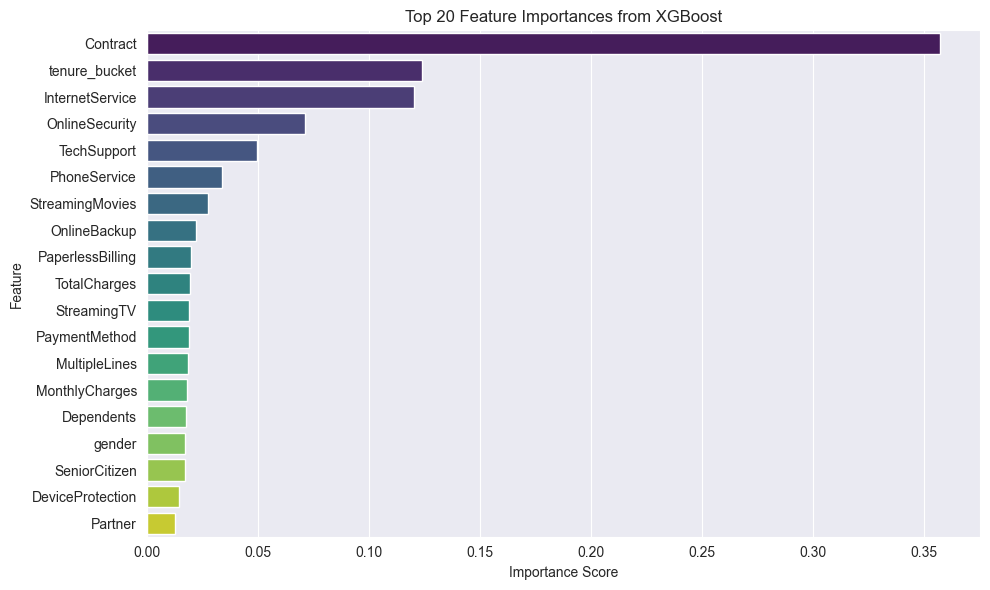

In [51]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_features_df, x='Importance', y='Feature', palette='viridis')
plt.title('Top 20 Feature Importances from XGBoost')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [52]:
!{sys.executable} -m pip install shap


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\6623682\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [53]:
import shap

C:\Users\6623682\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


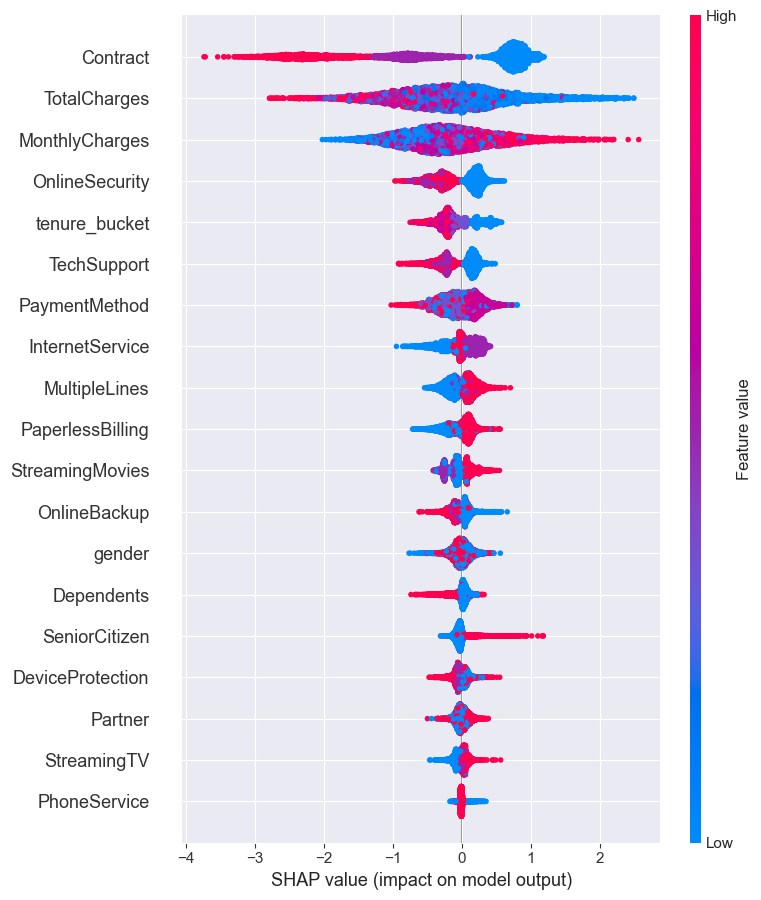

In [54]:
explainer = shap.Explainer(model)
shap_values = explainer(X)
shap.summary_plot(shap_values, X)

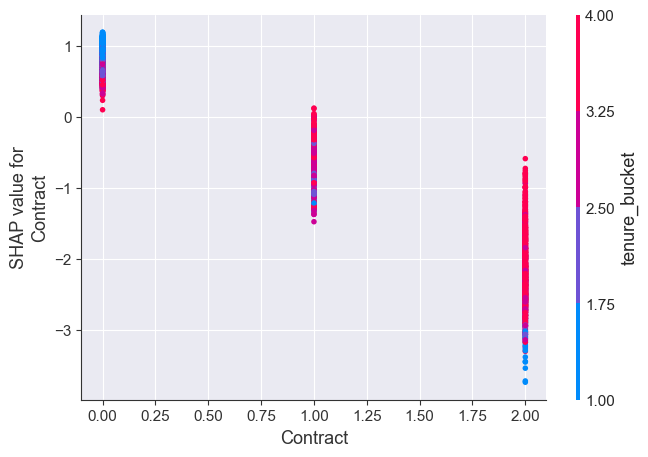

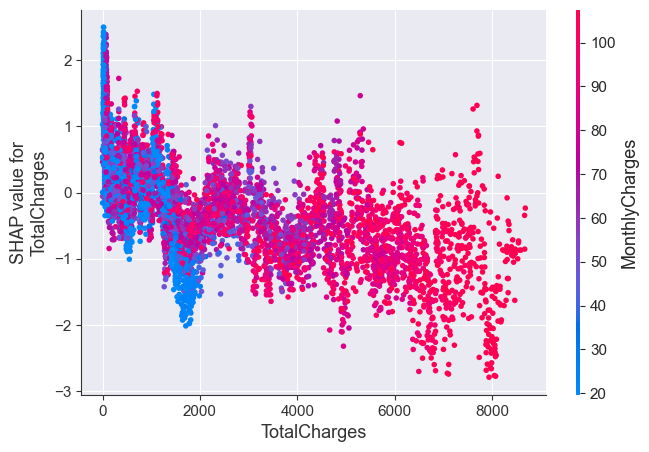

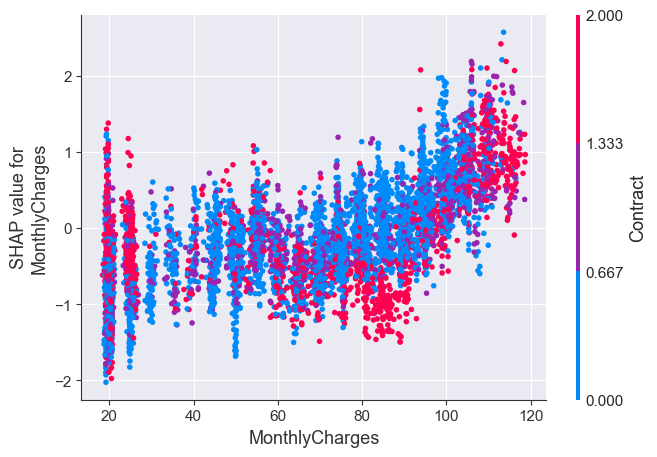

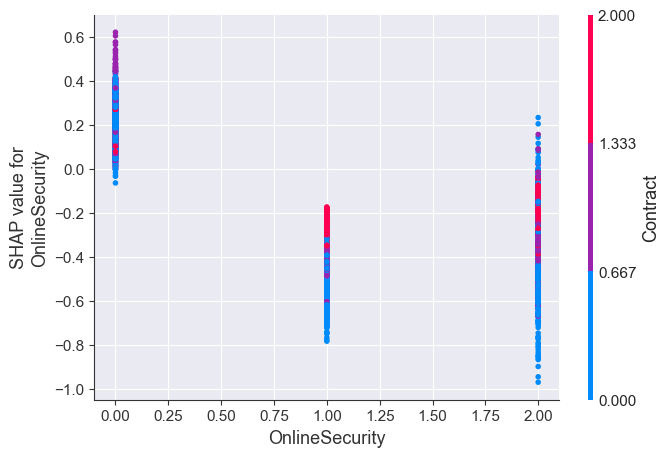

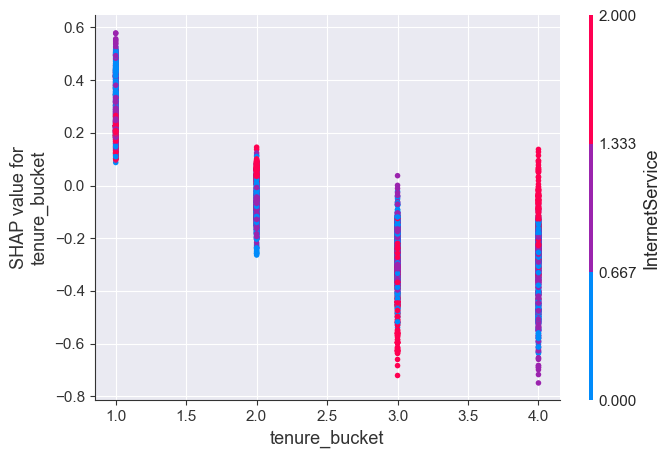

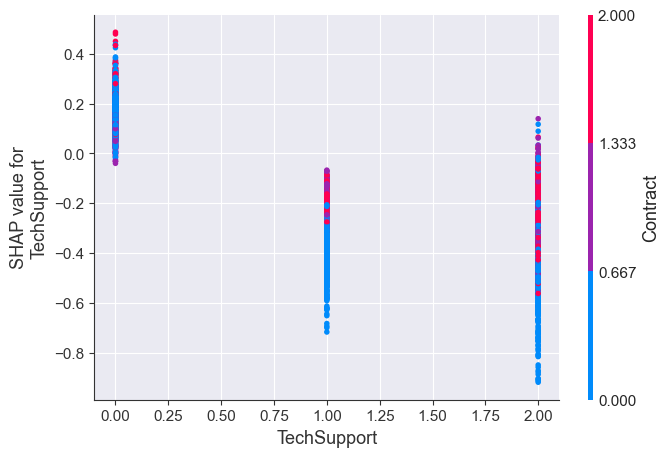

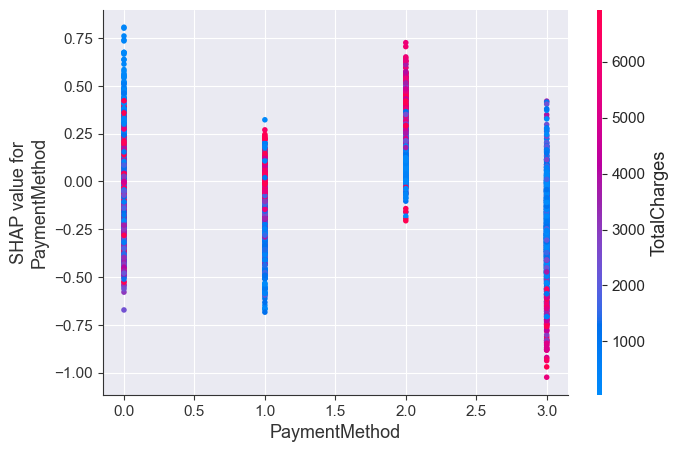

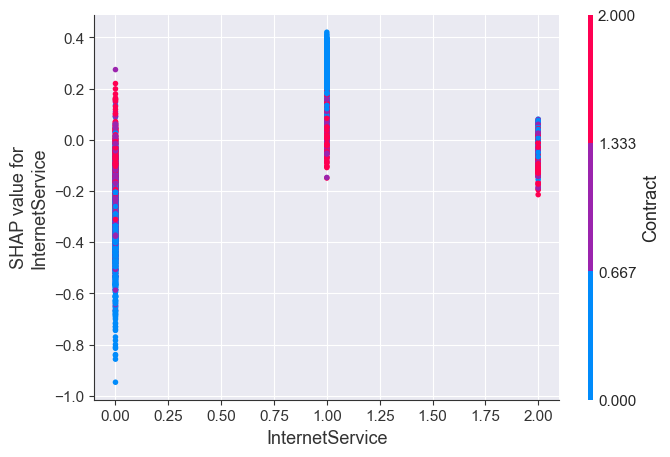

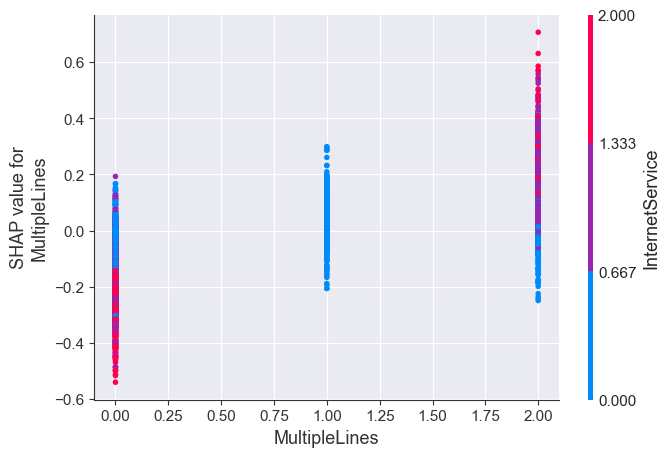

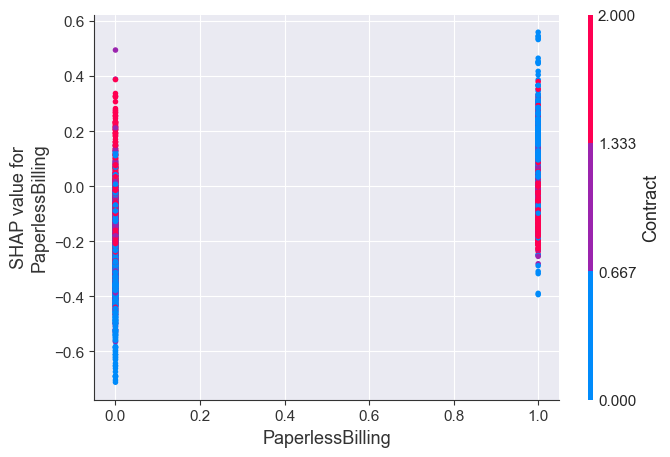

In [55]:
shap_mean_abs = np.abs(shap_values.values).mean(axis=0)
top_feature_names = pd.Series(shap_mean_abs, index=X.columns).sort_values(ascending=False).head(10).index.tolist()
for feature in top_feature_names:
    shap.dependence_plot(feature, shap_values.values, X)


In [56]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [57]:
top_feature_names

['Contract',
 'TotalCharges',
 'MonthlyCharges',
 'OnlineSecurity',
 'tenure_bucket',
 'TechSupport',
 'PaymentMethod',
 'InternetService',
 'MultipleLines',
 'PaperlessBilling']

In [58]:
X_cluster = X[top_feature_names]

In [59]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

In [60]:
wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

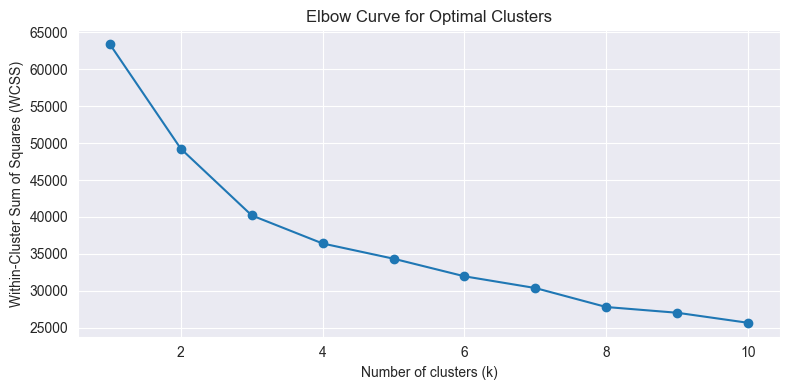

In [61]:
plt.figure(figsize=(8, 4))
plt.plot(K_range, wcss, marker='o')
plt.title('Elbow Curve for Optimal Clusters')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [62]:
optimal_k = 2

kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
df_dummy['cohort_cluster'] = kmeans_final.fit_predict(X_scaled)

In [63]:
label_encoded_features = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod'
]

numerical_features = ['MonthlyCharges', 'TotalCharges', 'tenure_bucket']

# agg_dict = {col: 'mean' for col in label_encoded_features}
agg_dict = {col: 'mean' for col in numerical_features}
# agg_dict.update({col: 'mean' for col in numerical_features})
agg_dict.update({'Churn_target': ['mean', 'count']})

cohort_summary = df_dummy.groupby('cohort_cluster').agg(agg_dict).round(2)

display(cohort_summary)


MonthlyCharges TotalCharges tenure_bucket Churn_target      
                         mean         mean          mean         mean count
cohort_cluster                                                             
0                       53.26       849.32          2.08         0.34  3955
1                       83.84      4639.83          3.66         0.14  2383

In [64]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

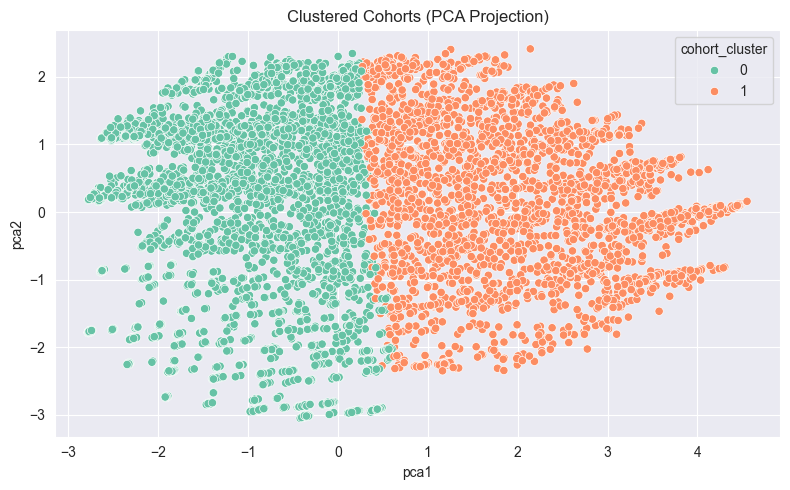

In [65]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_dummy['pca1'] = X_pca[:, 0]
df_dummy['pca2'] = X_pca[:, 1]


plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_dummy, x='pca1', y='pca2', hue='cohort_cluster', palette='Set2')
plt.title('Clustered Cohorts (PCA Projection)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [66]:
df_dummy.head(5)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn_target,tenure_bucket,cohort_cluster,pca1,pca2
5769,0,0,1,1,1,2,1,2,2,2,0,2,2,2,1,0,109.00,7661.80,0,4,1,3.654058,0.684319
1834,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,2,45.10,45.10,1,1,0,-2.506297,0.228231
3168,0,0,0,0,1,0,2,1,1,1,1,1,1,1,1,3,19.35,1033.00,0,3,0,-1.121715,-1.540602
4205,0,0,1,1,1,2,0,2,0,2,0,2,2,2,0,1,78.60,1846.65,0,3,1,1.359047,-0.519359
6218,0,0,1,1,0,1,0,0,2,2,2,2,2,1,1,0,58.40,4113.15,0,4,1,1.800034,0.341858


In [67]:
from sklearn.model_selection import train_test_split

In [68]:
train_1 = df_dummy[df_dummy['cohort_cluster'] == 0]
train_2 = df_dummy[df_dummy['cohort_cluster'] == 1]

In [69]:
train_1.to_csv("train_cluster_1.csv", index=False)
train_2.to_csv("train_cluster_2.csv", index=False)
val_df.to_csv("validation.csv", index=False)

In [70]:
!{sys.executable} -m pip install catboost


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\6623682\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [71]:
!{sys.executable} -m pip install imbalanced-learn


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\6623682\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [72]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
from sklearn.calibration import CalibratedClassifierCV
import numpy as np
import pickle

In [73]:
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, roc_curve
import matplotlib.pyplot as plt

def evaluate_model_no_cutoff(model_name, y_true_train, y_proba_train, y_true_test, y_proba_test):
    print(f"\n=== Metrics for {model_name} ===\n")

    auc_train = roc_auc_score(y_true_train, y_proba_train)
    auc_test = roc_auc_score(y_true_test, y_proba_test)
    print(f"Train AUC: {auc_train:.4f}")
    print(f"Test AUC:  {auc_test:.4f}")

    y_train_pred_05 = (y_proba_train >= 0.5).astype(int)
    y_test_pred_05 = (y_proba_test >= 0.5).astype(int)

    print("\nConfusion Matrix (Train, Threshold 0.5):")
    print(confusion_matrix(y_true_train, y_train_pred_05))

    print("\nConfusion Matrix (Test, Threshold 0.5):")
    print(confusion_matrix(y_true_test, y_test_pred_05))

    # Classification Report
    print("\nClassification Report (Train, Threshold 0.5):")
    print(classification_report(y_true_train, y_train_pred_05))

    print("\nClassification Report (Test, Threshold 0.5):")
    print(classification_report(y_true_test, y_test_pred_05))

    fpr_train, tpr_train, _ = roc_curve(y_true_train, y_proba_train)
    fpr_test, tpr_test, _ = roc_curve(y_true_test, y_proba_test)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr_train, tpr_train, label=f'Train AUC = {auc_train:.4f}')
    plt.plot(fpr_test, tpr_test, label=f'Test AUC = {auc_test:.4f}', linestyle='--')
    plt.plot([0,1], [0,1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    plt.title(f'AUC-ROC Curve: {model_name}')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Doing for data Train_Cluster_1

In [74]:
X1 = train_1[top_feature_names]
y1 = train_1['Churn_target']

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X1, y1, test_size=0.30, random_state=42, stratify=y1
)

print(X_train1.shape)
print(X_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(2768, 10)
(1187, 10)
(2768,)
(1187,)



=== Metrics for Logistic Regression ===

Train AUC: 0.8262
Test AUC:  0.8247

Confusion Matrix (Train, Threshold 0.5):
[[1538  287]
 [ 371  572]]

Confusion Matrix (Test, Threshold 0.5):
[[642 140]
 [155 250]]

Classification Report (Train, Threshold 0.5):
              precision    recall  f1-score   support

           0       0.81      0.84      0.82      1825
           1       0.67      0.61      0.63       943

    accuracy                           0.76      2768
   macro avg       0.74      0.72      0.73      2768
weighted avg       0.76      0.76      0.76      2768


Classification Report (Test, Threshold 0.5):
              precision    recall  f1-score   support

           0       0.81      0.82      0.81       782
           1       0.64      0.62      0.63       405

    accuracy                           0.75      1187
   macro avg       0.72      0.72      0.72      1187
weighted avg       0.75      0.75      0.75      1187



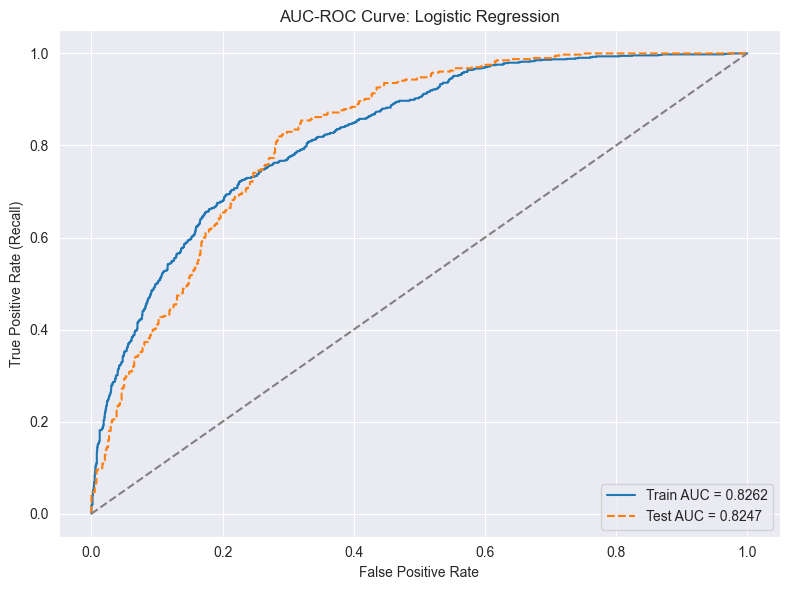

In [75]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train1)
X_test_scaled = scaler.transform(X_test1)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train1)

y_train_proba = lr.predict_proba(X_train_scaled)[:,1]
y_test_proba = lr.predict_proba(X_test_scaled)[:,1]

evaluate_model_no_cutoff("Logistic Regression", y_train1, y_train_proba, y_test1, y_test_proba)

Best Params (LR): {'C': 0.01}

=== Metrics for Logistic Regression (tuned) ===

Train AUC: 0.8259
Test AUC:  0.8243

Confusion Matrix (Train, Threshold 0.5):
[[1558  267]
 [ 384  559]]

Confusion Matrix (Test, Threshold 0.5):
[[644 138]
 [165 240]]

Classification Report (Train, Threshold 0.5):
              precision    recall  f1-score   support

           0       0.80      0.85      0.83      1825
           1       0.68      0.59      0.63       943

    accuracy                           0.76      2768
   macro avg       0.74      0.72      0.73      2768
weighted avg       0.76      0.76      0.76      2768


Classification Report (Test, Threshold 0.5):
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       782
           1       0.63      0.59      0.61       405

    accuracy                           0.74      1187
   macro avg       0.72      0.71      0.71      1187
weighted avg       0.74      0.74      0.74      1187



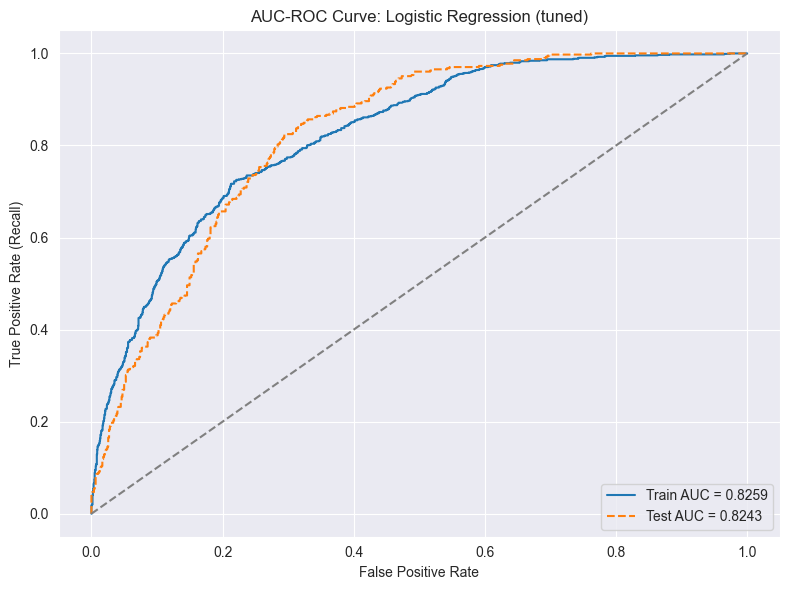

In [76]:
param_grid_lr = {'C': [0.01, 0.1, 1, 10]}
lr = LogisticRegression(max_iter=1000)

grid_lr = GridSearchCV(lr, param_grid_lr, cv=3, scoring='roc_auc', n_jobs=-1)
grid_lr.fit(X_train_scaled, y_train1)

best_lr = grid_lr.best_estimator_
print("Best Params (LR):", grid_lr.best_params_)

y_train_proba = best_lr.predict_proba(X_train_scaled)[:,1]
y_test_proba = best_lr.predict_proba(X_test_scaled)[:,1]
evaluate_model_no_cutoff("Logistic Regression (tuned)", y_train1, y_train_proba, y_test1, y_test_proba)


=== Metrics for Logistic Regression (tuned) ===

Train AUC: 0.9999
Test AUC:  0.6891

Confusion Matrix (Train, Threshold 0.5):
[[1816    9]
 [   5  938]]

Confusion Matrix (Test, Threshold 0.5):
[[600 182]
 [157 248]]

Classification Report (Train, Threshold 0.5):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1825
           1       0.99      0.99      0.99       943

    accuracy                           0.99      2768
   macro avg       0.99      0.99      0.99      2768
weighted avg       0.99      0.99      0.99      2768


Classification Report (Test, Threshold 0.5):
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       782
           1       0.58      0.61      0.59       405

    accuracy                           0.71      1187
   macro avg       0.68      0.69      0.69      1187
weighted avg       0.72      0.71      0.72      1187



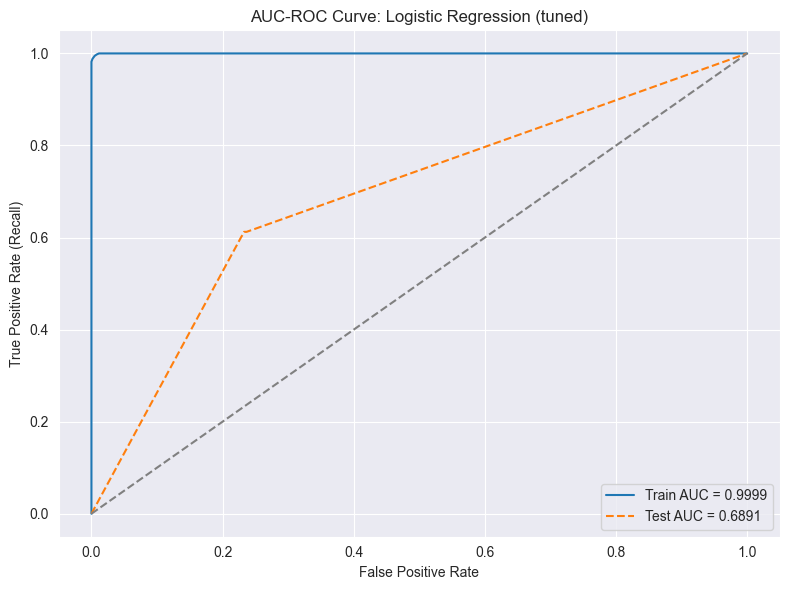

In [77]:
dt = DecisionTreeClassifier()
dt.fit(X_train1, y_train1)

y_train_proba = dt.predict_proba(X_train1)[:,1]
y_test_proba = dt.predict_proba(X_test1)[:,1]

evaluate_model_no_cutoff("Logistic Regression (tuned)", y_train1, y_train_proba, y_test1, y_test_proba)

Best Params (DT): {'max_depth': 5, 'min_samples_split': 2}

=== Metrics for Decision Tree (tuned) ===

Train AUC: 0.8369
Test AUC:  0.8154

Confusion Matrix (Train, Threshold 0.5):
[[1474  351]
 [ 306  637]]

Confusion Matrix (Test, Threshold 0.5):
[[608 174]
 [130 275]]

Classification Report (Train, Threshold 0.5):
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1825
           1       0.64      0.68      0.66       943

    accuracy                           0.76      2768
   macro avg       0.74      0.74      0.74      2768
weighted avg       0.77      0.76      0.76      2768


Classification Report (Test, Threshold 0.5):
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       782
           1       0.61      0.68      0.64       405

    accuracy                           0.74      1187
   macro avg       0.72      0.73      0.72      1187
weighted avg       0.75      0.74   

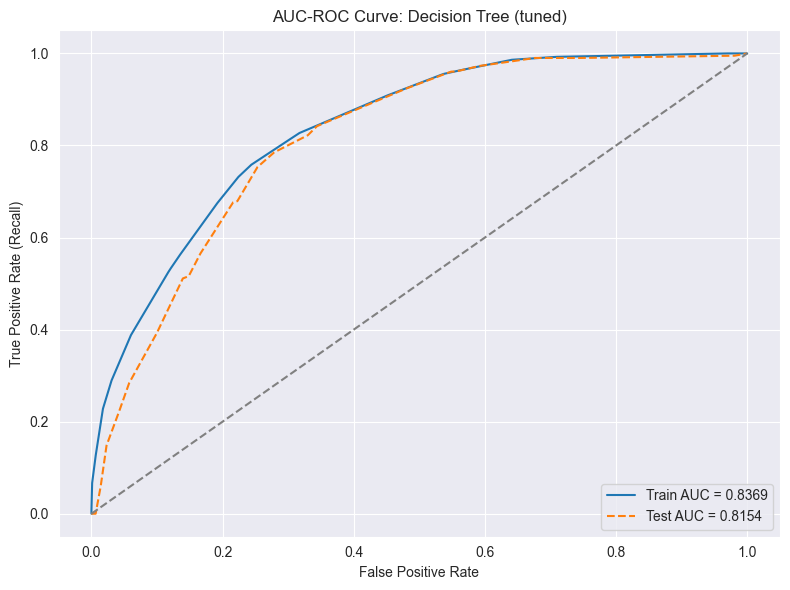

In [78]:
param_grid_dt = {'max_depth': [3, 5, 10], 'min_samples_split': [2, 5, 10]}
dt = DecisionTreeClassifier()

grid_dt = GridSearchCV(dt, param_grid_dt, cv=3, scoring='roc_auc', n_jobs=-1)
grid_dt.fit(X_train1, y_train1)

best_dt = grid_dt.best_estimator_
print("Best Params (DT):", grid_dt.best_params_)

y_train_proba = best_dt.predict_proba(X_train1)[:,1]
y_test_proba = best_dt.predict_proba(X_test1)[:,1]
evaluate_model_no_cutoff("Decision Tree (tuned)", y_train1, y_train_proba, y_test1, y_test_proba)


=== Metrics for Random Forrest ===

Train AUC: 0.9996
Test AUC:  0.8180

Confusion Matrix (Train, Threshold 0.5):
[[1819    6]
 [   8  935]]

Confusion Matrix (Test, Threshold 0.5):
[[640 142]
 [149 256]]

Classification Report (Train, Threshold 0.5):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1825
           1       0.99      0.99      0.99       943

    accuracy                           0.99      2768
   macro avg       0.99      0.99      0.99      2768
weighted avg       0.99      0.99      0.99      2768


Classification Report (Test, Threshold 0.5):
              precision    recall  f1-score   support

           0       0.81      0.82      0.81       782
           1       0.64      0.63      0.64       405

    accuracy                           0.75      1187
   macro avg       0.73      0.73      0.73      1187
weighted avg       0.75      0.75      0.75      1187



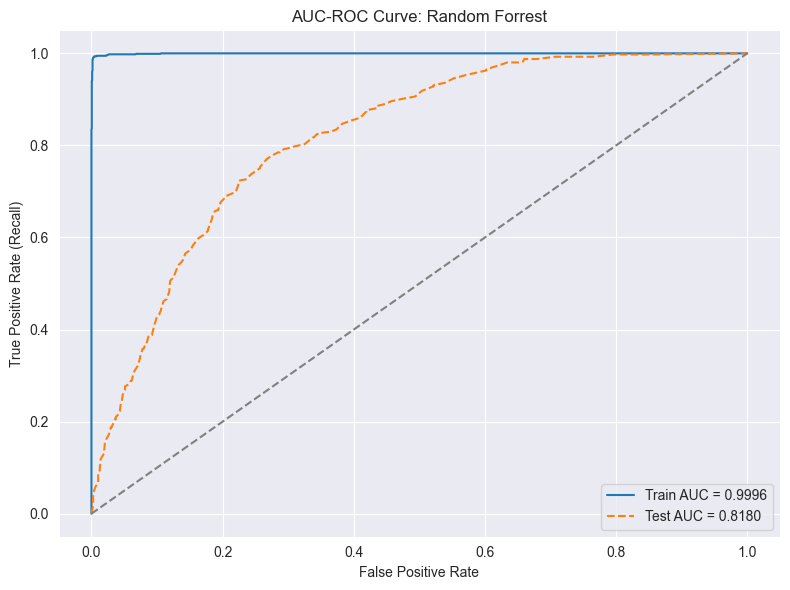

In [79]:
rf = RandomForestClassifier()
rf.fit(X_train1, y_train1)

y_train_proba = rf.predict_proba(X_train1)[:,1]
y_test_proba = rf.predict_proba(X_test1)[:,1]
evaluate_model_no_cutoff("Random Forrest", y_train1, y_train_proba, y_test1, y_test_proba)

Best Params (RF): {'max_depth': 5, 'n_estimators': 200}

=== Metrics for Random Forrest (tuned) ===

Train AUC: 0.8533
Test AUC:  0.8359

Confusion Matrix (Train, Threshold 0.5):
[[1591  234]
 [ 364  579]]

Confusion Matrix (Test, Threshold 0.5):
[[648 134]
 [150 255]]

Classification Report (Train, Threshold 0.5):
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1825
           1       0.71      0.61      0.66       943

    accuracy                           0.78      2768
   macro avg       0.76      0.74      0.75      2768
weighted avg       0.78      0.78      0.78      2768


Classification Report (Test, Threshold 0.5):
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       782
           1       0.66      0.63      0.64       405

    accuracy                           0.76      1187
   macro avg       0.73      0.73      0.73      1187
weighted avg       0.76      0.76     

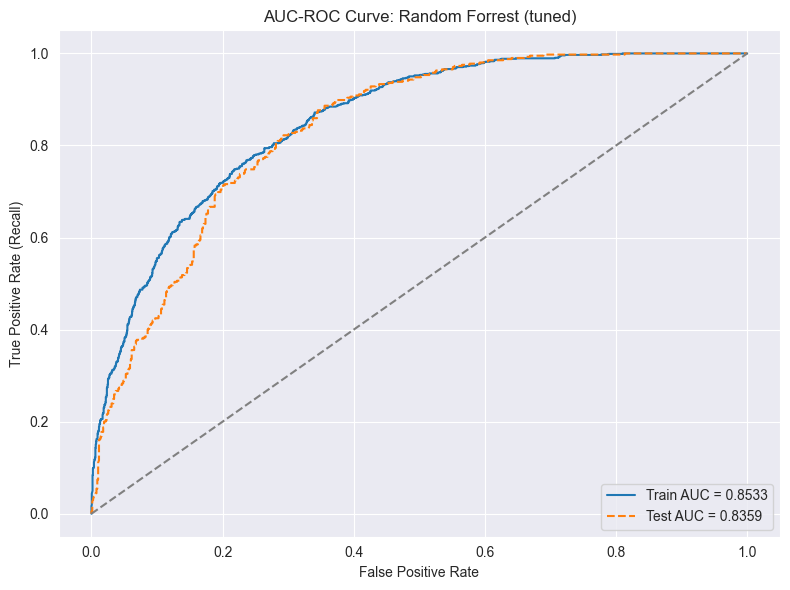

In [80]:
param_grid_rf = {'n_estimators': [100, 200], 'max_depth': [5, 10, 15]}
rf = RandomForestClassifier()

grid_rf = GridSearchCV(rf, param_grid_rf, cv=3, scoring='roc_auc', n_jobs=-1)
grid_rf.fit(X_train1, y_train1)

best_rf = grid_rf.best_estimator_
print("Best Params (RF):", grid_rf.best_params_)

y_train_proba = best_rf.predict_proba(X_train1)[:,1]
y_test_proba = best_rf.predict_proba(X_test1)[:,1]
evaluate_model_no_cutoff("Random Forrest (tuned)", y_train1, y_train_proba, y_test1, y_test_proba)


=== Metrics for Catboost ===

Train AUC: 0.9241
Test AUC:  0.8333

Confusion Matrix (Train, Threshold 0.5):
[[1668  157]
 [ 268  675]]

Confusion Matrix (Test, Threshold 0.5):
[[645 137]
 [162 243]]

Classification Report (Train, Threshold 0.5):
              precision    recall  f1-score   support

           0       0.86      0.91      0.89      1825
           1       0.81      0.72      0.76       943

    accuracy                           0.85      2768
   macro avg       0.84      0.81      0.82      2768
weighted avg       0.84      0.85      0.84      2768


Classification Report (Test, Threshold 0.5):
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       782
           1       0.64      0.60      0.62       405

    accuracy                           0.75      1187
   macro avg       0.72      0.71      0.72      1187
weighted avg       0.74      0.75      0.75      1187



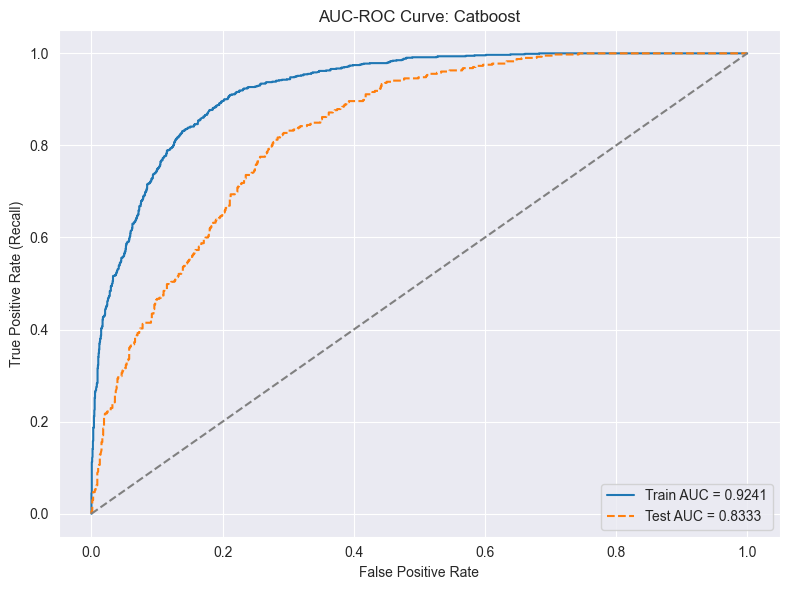

In [81]:
cat = CatBoostClassifier(verbose=0)
cat.fit(X_train1, y_train1)

y_train_proba = cat.predict_proba(X_train1)[:,1]
y_test_proba = cat.predict_proba(X_test1)[:,1]
evaluate_model_no_cutoff("Catboost", y_train1, y_train_proba, y_test1, y_test_proba)

Best Params (CatBoost): {'depth': 4, 'learning_rate': 0.01}

=== Metrics for Catboost (tuned) ===

Train AUC: 0.8641
Test AUC:  0.8397

Confusion Matrix (Train, Threshold 0.5):
[[1611  214]
 [ 342  601]]

Confusion Matrix (Test, Threshold 0.5):
[[649 133]
 [161 244]]

Classification Report (Train, Threshold 0.5):
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1825
           1       0.74      0.64      0.68       943

    accuracy                           0.80      2768
   macro avg       0.78      0.76      0.77      2768
weighted avg       0.80      0.80      0.80      2768


Classification Report (Test, Threshold 0.5):
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       782
           1       0.65      0.60      0.62       405

    accuracy                           0.75      1187
   macro avg       0.72      0.72      0.72      1187
weighted avg       0.75      0.75      0

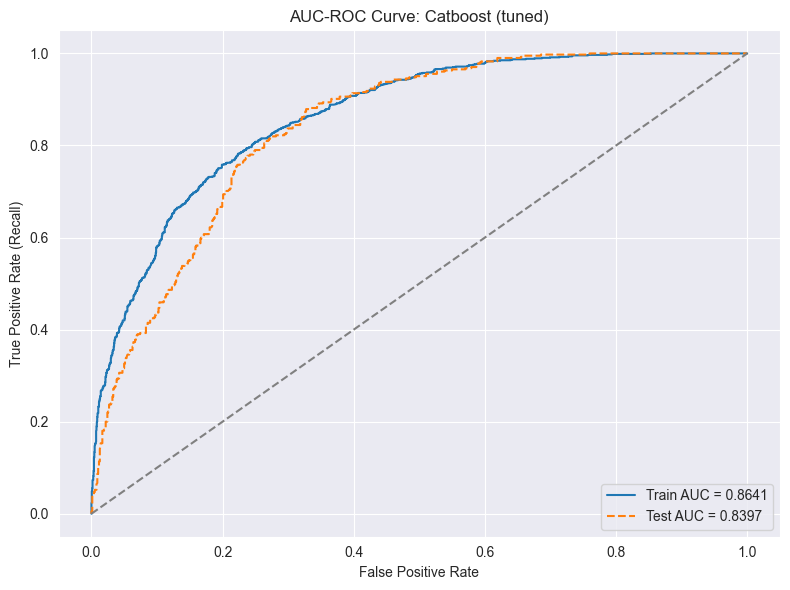

In [82]:
param_grid_cat = {'depth': [4, 6, 8], 'learning_rate': [0.01, 0.1, 0.3]}
cat = CatBoostClassifier(verbose=0)

grid_cat = GridSearchCV(cat, param_grid_cat, cv=3, scoring='roc_auc', n_jobs=-1)
grid_cat.fit(X_train1, y_train1)

best_cat = grid_cat.best_estimator_
print("Best Params (CatBoost):", grid_cat.best_params_)

y_train_proba = best_cat.predict_proba(X_train1)[:,1]
y_test_proba = best_cat.predict_proba(X_test1)[:,1]
evaluate_model_no_cutoff("Catboost (tuned)", y_train1, y_train_proba, y_test1, y_test_proba)

02 Train_Cluster_2

In [83]:
X2 = train_2[top_feature_names]
y2 = train_2['Churn_target']

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, y2, test_size=0.30, random_state=42, stratify=y2
)

print(X_train2.shape)
print(X_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

(1668, 10)
(715, 10)
(1668,)
(715,)


In [84]:
ros = RandomOverSampler(sampling_strategy=0.7, random_state=42)
rus = RandomUnderSampler(sampling_strategy=0.7, random_state=42)

X_train_s, y_train_s = ros.fit_resample(X_train2, y_train2)
X_train_s, y_train_s = rus.fit_resample(X_train2, y_train2)

print(f"Oversample + Undersample complete. New shape: {X_train_s.shape}")
print(y_train_s.shape)

Oversample + Undersample complete. New shape: (568, 10)
(568,)


In [85]:
y_train_s.value_counts()

Churn_target
0    334
1    234
Name: count, dtype: int64


=== Metrics for Logistic ===

Train AUC: 0.8203
Test AUC:  0.8096

Confusion Matrix (Train, Threshold 0.5):
[[272  62]
 [ 68 166]]

Confusion Matrix (Test, Threshold 0.5):
[[487 128]
 [ 35  65]]

Classification Report (Train, Threshold 0.5):
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       334
           1       0.73      0.71      0.72       234

    accuracy                           0.77       568
   macro avg       0.76      0.76      0.76       568
weighted avg       0.77      0.77      0.77       568


Classification Report (Test, Threshold 0.5):
              precision    recall  f1-score   support

           0       0.93      0.79      0.86       615
           1       0.34      0.65      0.44       100

    accuracy                           0.77       715
   macro avg       0.63      0.72      0.65       715
weighted avg       0.85      0.77      0.80       715



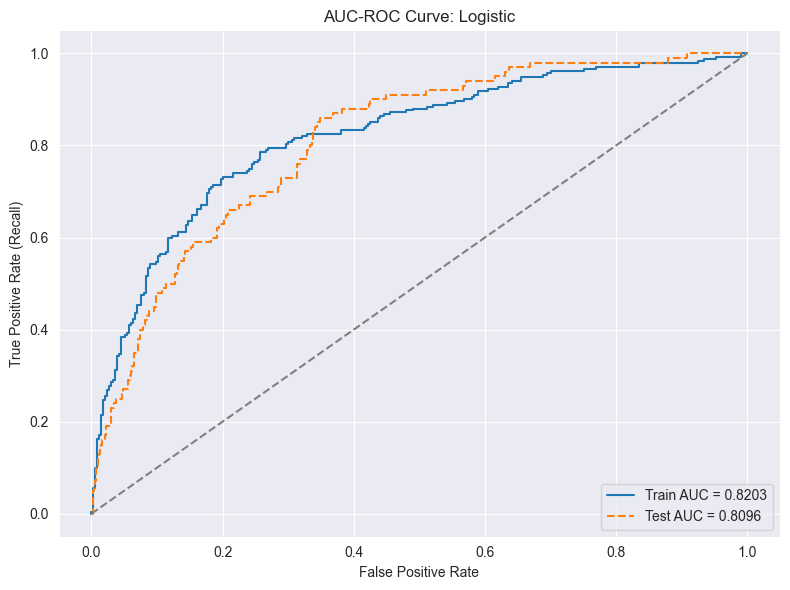

In [86]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_s)
X_test_scaled = scaler.transform(X_test2)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train_s)

y_train_proba = lr.predict_proba(X_train_scaled)[:,1]
y_test_proba = lr.predict_proba(X_test_scaled)[:,1]
evaluate_model_no_cutoff("Logistic", y_train_s, y_train_proba, y_test2, y_test_proba)

Best Params (LR): {'C': 1}

=== Metrics for Logistic Regression (tuned) ===

Train AUC: 0.8203
Test AUC:  0.8096

Confusion Matrix (Train, Threshold 0.5):
[[272  62]
 [ 68 166]]

Confusion Matrix (Test, Threshold 0.5):
[[487 128]
 [ 35  65]]

Classification Report (Train, Threshold 0.5):
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       334
           1       0.73      0.71      0.72       234

    accuracy                           0.77       568
   macro avg       0.76      0.76      0.76       568
weighted avg       0.77      0.77      0.77       568


Classification Report (Test, Threshold 0.5):
              precision    recall  f1-score   support

           0       0.93      0.79      0.86       615
           1       0.34      0.65      0.44       100

    accuracy                           0.77       715
   macro avg       0.63      0.72      0.65       715
weighted avg       0.85      0.77      0.80       715



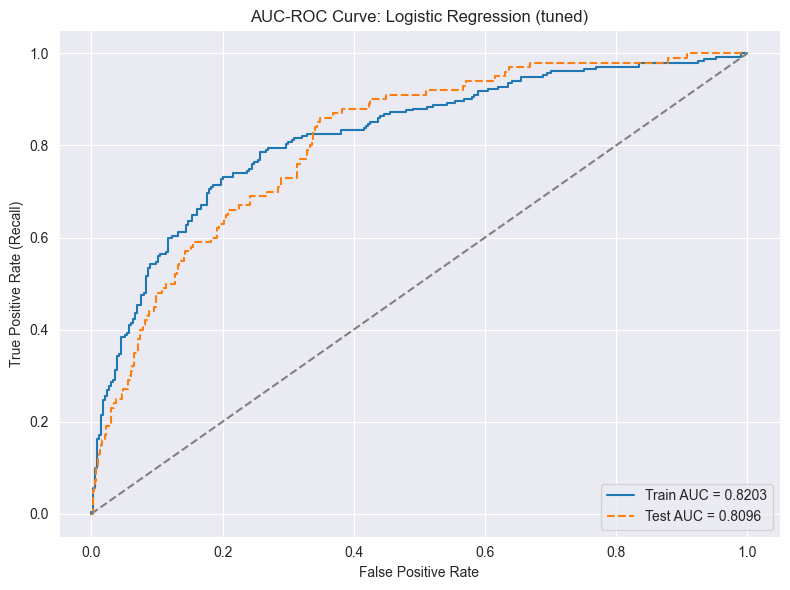

In [87]:
param_grid_lr = {'C': [0.01, 0.1, 1, 10]}
lr = LogisticRegression(max_iter=1000)

grid_lr = GridSearchCV(lr, param_grid_lr, cv=3, scoring='roc_auc', n_jobs=-1)
grid_lr.fit(X_train_scaled, y_train_s)

best_lr = grid_lr.best_estimator_
print("Best Params (LR):", grid_lr.best_params_)

y_train_proba = best_lr.predict_proba(X_train_scaled)[:,1]
y_test_proba = best_lr.predict_proba(X_test_scaled)[:,1]
evaluate_model_no_cutoff("Logistic Regression (tuned)", y_train_s, y_train_proba, y_test2, y_test_proba)


=== Metrics for DT ===

Train AUC: 1.0000
Test AUC:  0.6635

Confusion Matrix (Train, Threshold 0.5):
[[334   0]
 [  0 234]]

Confusion Matrix (Test, Threshold 0.5):
[[441 174]
 [ 39  61]]

Classification Report (Train, Threshold 0.5):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       334
           1       1.00      1.00      1.00       234

    accuracy                           1.00       568
   macro avg       1.00      1.00      1.00       568
weighted avg       1.00      1.00      1.00       568


Classification Report (Test, Threshold 0.5):
              precision    recall  f1-score   support

           0       0.92      0.72      0.81       615
           1       0.26      0.61      0.36       100

    accuracy                           0.70       715
   macro avg       0.59      0.66      0.58       715
weighted avg       0.83      0.70      0.74       715



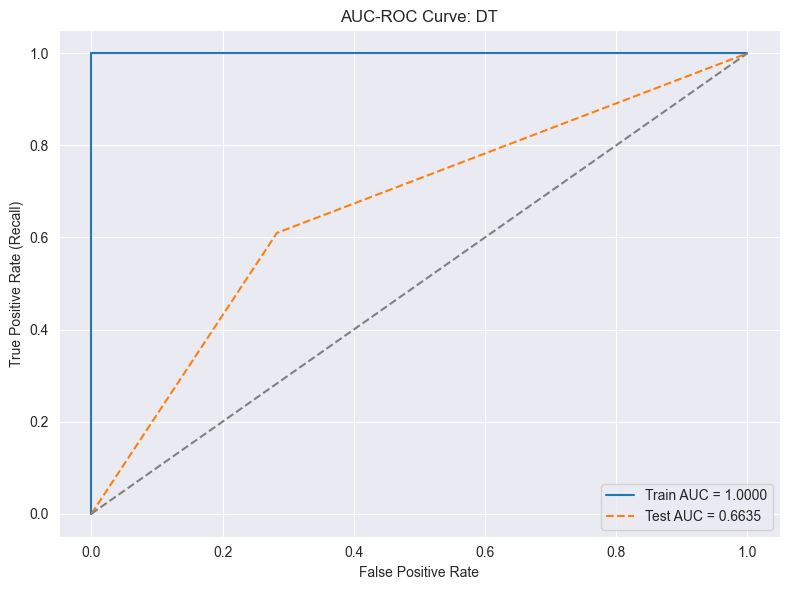

In [88]:
dt = DecisionTreeClassifier()
dt.fit(X_train_s, y_train_s)

y_train_proba = dt.predict_proba(X_train_s)[:,1]
y_test_proba = dt.predict_proba(X_test2)[:,1]

evaluate_model_no_cutoff("DT", y_train_s, y_train_proba, y_test2, y_test_proba)

Best Params (DT): {'max_depth': 3, 'min_samples_split': 2}

=== Metrics for Decision Tree (tuned) ===

Train AUC: 0.8171
Test AUC:  0.7765

Confusion Matrix (Train, Threshold 0.5):
[[260  74]
 [ 59 175]]

Confusion Matrix (Test, Threshold 0.5):
[[464 151]
 [ 28  72]]

Classification Report (Train, Threshold 0.5):
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       334
           1       0.70      0.75      0.72       234

    accuracy                           0.77       568
   macro avg       0.76      0.76      0.76       568
weighted avg       0.77      0.77      0.77       568


Classification Report (Test, Threshold 0.5):
              precision    recall  f1-score   support

           0       0.94      0.75      0.84       615
           1       0.32      0.72      0.45       100

    accuracy                           0.75       715
   macro avg       0.63      0.74      0.64       715
weighted avg       0.86      0.75      0

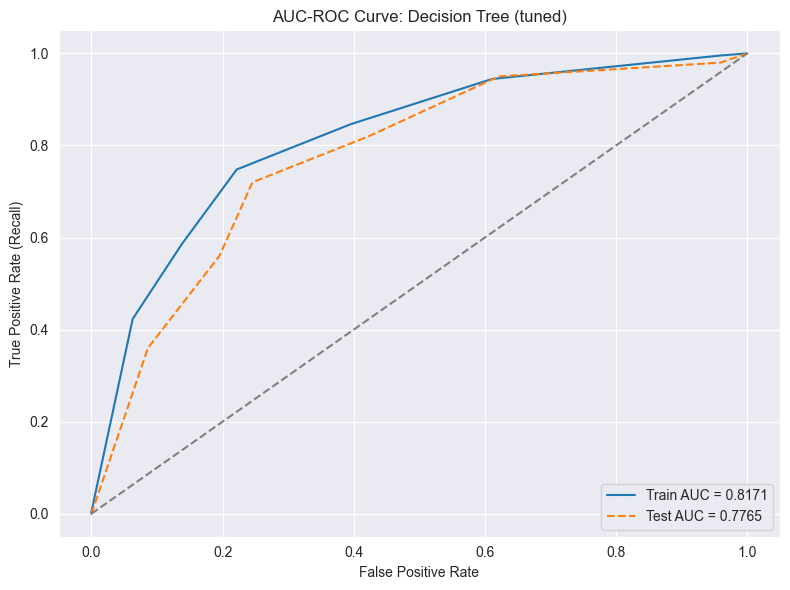

In [89]:
param_grid_dt = {'max_depth': [3, 5, 10], 'min_samples_split': [2, 5, 10]}
dt = DecisionTreeClassifier()

grid_dt = GridSearchCV(dt, param_grid_dt, cv=3, scoring='roc_auc', n_jobs=-1)
grid_dt.fit(X_train_s, y_train_s)

best_dt = grid_dt.best_estimator_
print("Best Params (DT):", grid_dt.best_params_)

y_train_proba = best_dt.predict_proba(X_train_s)[:,1]
y_test_proba = best_dt.predict_proba(X_test2)[:,1]
evaluate_model_no_cutoff("Decision Tree (tuned)", y_train_s, y_train_proba, y_test2, y_test_proba)


=== Metrics for Random Forrest ===

Train AUC: 1.0000
Test AUC:  0.7681

Confusion Matrix (Train, Threshold 0.5):
[[334   0]
 [  0 234]]

Confusion Matrix (Test, Threshold 0.5):
[[484 131]
 [ 37  63]]

Classification Report (Train, Threshold 0.5):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       334
           1       1.00      1.00      1.00       234

    accuracy                           1.00       568
   macro avg       1.00      1.00      1.00       568
weighted avg       1.00      1.00      1.00       568


Classification Report (Test, Threshold 0.5):
              precision    recall  f1-score   support

           0       0.93      0.79      0.85       615
           1       0.32      0.63      0.43       100

    accuracy                           0.77       715
   macro avg       0.63      0.71      0.64       715
weighted avg       0.84      0.77      0.79       715



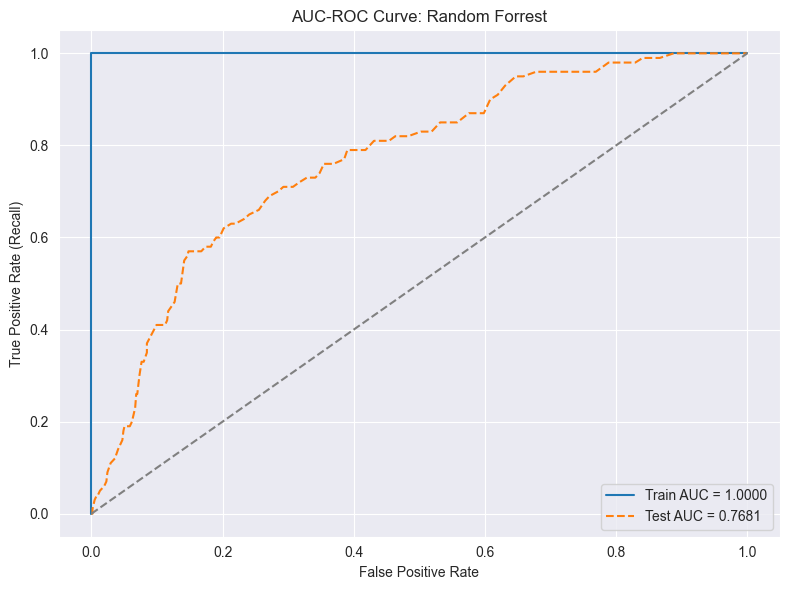

In [90]:
rf = RandomForestClassifier()
rf.fit(X_train_s, y_train_s)

y_train_proba = rf.predict_proba(X_train_s)[:,1]
y_test_proba = rf.predict_proba(X_test2)[:,1]
evaluate_model_no_cutoff("Random Forrest", y_train_s, y_train_proba, y_test2, y_test_proba)

Best Params (RF): {'max_depth': 5, 'n_estimators': 100}

=== Metrics for Random Forrest (tuned) ===

Train AUC: 0.9072
Test AUC:  0.8038

Confusion Matrix (Train, Threshold 0.5):
[[290  44]
 [ 52 182]]

Confusion Matrix (Test, Threshold 0.5):
[[474 141]
 [ 33  67]]

Classification Report (Train, Threshold 0.5):
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       334
           1       0.81      0.78      0.79       234

    accuracy                           0.83       568
   macro avg       0.83      0.82      0.82       568
weighted avg       0.83      0.83      0.83       568


Classification Report (Test, Threshold 0.5):
              precision    recall  f1-score   support

           0       0.93      0.77      0.84       615
           1       0.32      0.67      0.44       100

    accuracy                           0.76       715
   macro avg       0.63      0.72      0.64       715
weighted avg       0.85      0.76      0.7

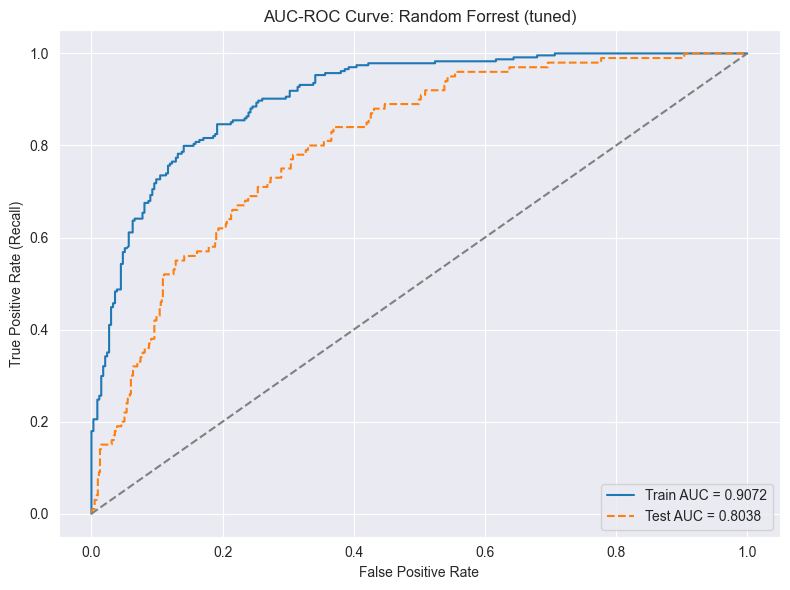

In [91]:
param_grid_rf = {'n_estimators': [100, 200], 'max_depth': [5, 10, 15]}
rf = RandomForestClassifier()

grid_rf = GridSearchCV(rf, param_grid_rf, cv=3, scoring='roc_auc', n_jobs=-1)
grid_rf.fit(X_train_s, y_train_s)

best_rf = grid_rf.best_estimator_
print("Best Params (RF):", grid_rf.best_params_)

y_train_proba = best_rf.predict_proba(X_train_s)[:,1]
y_test_proba = best_rf.predict_proba(X_test2)[:,1]
evaluate_model_no_cutoff("Random Forrest (tuned)", y_train_s, y_train_proba, y_test2, y_test_proba)


=== Metrics for Catboost ===

Train AUC: 0.9712
Test AUC:  0.7754

Confusion Matrix (Train, Threshold 0.5):
[[311  23]
 [ 31 203]]

Confusion Matrix (Test, Threshold 0.5):
[[470 145]
 [ 41  59]]

Classification Report (Train, Threshold 0.5):
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       334
           1       0.90      0.87      0.88       234

    accuracy                           0.90       568
   macro avg       0.90      0.90      0.90       568
weighted avg       0.90      0.90      0.90       568


Classification Report (Test, Threshold 0.5):
              precision    recall  f1-score   support

           0       0.92      0.76      0.83       615
           1       0.29      0.59      0.39       100

    accuracy                           0.74       715
   macro avg       0.60      0.68      0.61       715
weighted avg       0.83      0.74      0.77       715



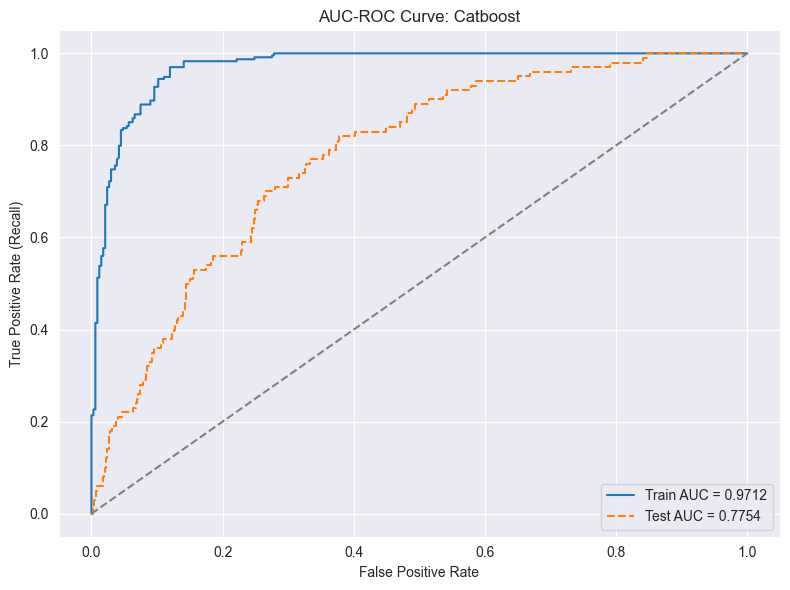

In [92]:
cat = CatBoostClassifier(verbose=0)
cat.fit(X_train_s, y_train_s)

y_train_proba = cat.predict_proba(X_train_s)[:,1]
y_test_proba = cat.predict_proba(X_test2)[:,1]
evaluate_model_no_cutoff("Catboost", y_train_s, y_train_proba, y_test2, y_test_proba)

Best Params (CatBoost): {'depth': 4, 'learning_rate': 0.01}

=== Metrics for Catboost (tuned) ===

Train AUC: 0.9426
Test AUC:  0.7905

Confusion Matrix (Train, Threshold 0.5):
[[300  34]
 [ 43 191]]

Confusion Matrix (Test, Threshold 0.5):
[[479 136]
 [ 40  60]]

Classification Report (Train, Threshold 0.5):
              precision    recall  f1-score   support

           0       0.87      0.90      0.89       334
           1       0.85      0.82      0.83       234

    accuracy                           0.86       568
   macro avg       0.86      0.86      0.86       568
weighted avg       0.86      0.86      0.86       568


Classification Report (Test, Threshold 0.5):
              precision    recall  f1-score   support

           0       0.92      0.78      0.84       615
           1       0.31      0.60      0.41       100

    accuracy                           0.75       715
   macro avg       0.61      0.69      0.63       715
weighted avg       0.84      0.75      0.78 

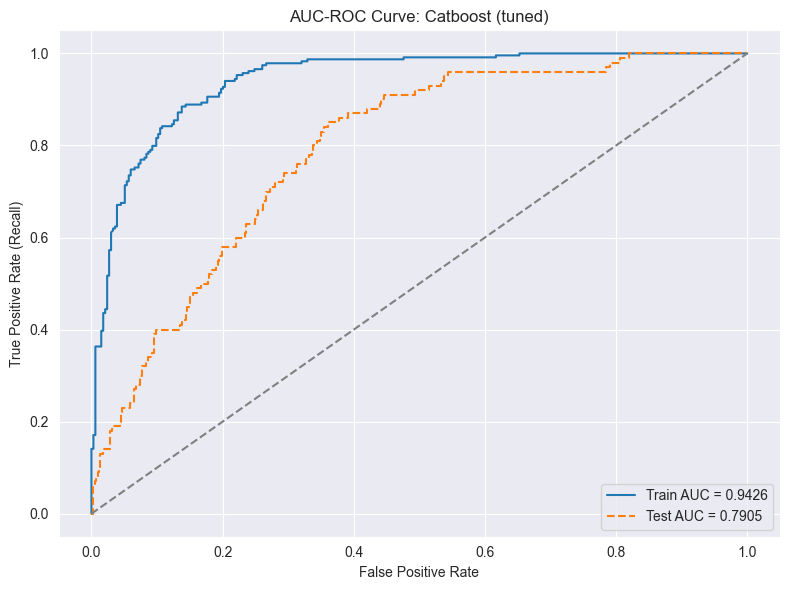

In [93]:
param_grid_cat = {'depth': [4, 6, 8], 'learning_rate': [0.01, 0.1, 0.3]}
cat = CatBoostClassifier(verbose=0)

grid_cat = GridSearchCV(cat, param_grid_cat, cv=3, scoring='roc_auc', n_jobs=-1)
grid_cat.fit(X_train_s, y_train_s)

best_cat = grid_cat.best_estimator_
print("Best Params (CatBoost):", grid_cat.best_params_)

y_train_proba = best_cat.predict_proba(X_train_s)[:,1]
y_test_proba = best_cat.predict_proba(X_test2)[:,1]
evaluate_model_no_cutoff("Catboost (tuned)", y_train_s, y_train_proba, y_test2, y_test_proba)

We have identified Catboost (tuned) works best for Cluster 0 and Logreg (tuned) + Sampled works best for Cluster 1

In [94]:
import pickle
import joblib
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.calibration import CalibratedClassifierCV

In [95]:
os.makedirs('artifacts', exist_ok=True)

In [96]:
df_dummy.head(2)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn_target,tenure_bucket,cohort_cluster,pca1,pca2
5769,0,0,1,1,1,2,1,2,2,2,0,2,2,2,1,0,109.0,7661.8,0,4,1,3.654058,0.684319
1834,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,2,45.1,45.1,1,1,0,-2.506297,0.228231


In [97]:
label_encoders = {}

# cate_cols = df_dummy.select_dtypes(include='object').columns
df_dummy2 = df.copy()
cate_cols = df_dummy2.select_dtypes(include='object').columns

for col in cate_cols:
    le = LabelEncoder()
    df_dummy2[col] = le.fit_transform(df_dummy2[col])
    label_encoders[col] = le

with open("artifacts/label_encoders.pkl", 'wb') as f:
    pickle.dump(label_encoders, f)

In [98]:
joblib.dump(kmeans_final, "artifacts/kmeans_model.pkl")
print("Saved kmeans_model.pkl")

Saved kmeans_model.pkl


In [99]:
cat = CatBoostClassifier(verbose=0)
param_grid_cat = {'depth': [6], 'learning_rate': [0.1]}
grid_cat = GridSearchCV(cat, param_grid_cat, cv=3, scoring='roc_auc', n_jobs=-1)
grid_cat.fit(X_train1, y_train1)
best_cat = grid_cat.best_estimator_

In [100]:
calibrated_cat = CalibratedClassifierCV(estimator=best_cat, method='sigmoid', cv=3)
calibrated_cat.fit(X_train1, y_train1)

with open("calibrated_model_cluster_01_CatBoost.pkl", 'wb') as f:
    pickle.dump(calibrated_cat, f)

print("Saved calibrated_model_cluster_1_CatBoost.pkl")

Saved calibrated_model_cluster_1_CatBoost.pkl


In [101]:
scaler_2 = StandardScaler()
X_train_2_scaled = scaler_2.fit_transform(X_train_s)
X_test_2_scaled = scaler_2.transform(X_test2)

lr = LogisticRegression(max_iter=1000)
param_grid_lr = {'C': [1]}
grid_lr = GridSearchCV(lr, param_grid_lr, cv=3, scoring='roc_auc', n_jobs=-1)
grid_lr.fit(X_train_2_scaled, y_train_s)
best_lr = grid_lr.best_estimator_

In [102]:
calibrated_lr = CalibratedClassifierCV(estimator=best_lr, method='sigmoid', cv=3)
calibrated_lr.fit(X_train_2_scaled, y_train_s)

with open("calibrated_model_cluster_2_LR.pkl", 'wb') as f:
    pickle.dump(calibrated_lr, f)

# Save scaler
with open("scaler_cluster_2.pkl", 'wb') as f:
    pickle.dump(scaler_2, f)

print("Saved calibrated_model_cluster_2_LR.pkl and scaler_cluster_2.pkl")

Saved calibrated_model_cluster_2_LR.pkl and scaler_cluster_2.pkl
